[[Python] Keras-RLで簡単に強化学習(DQN)を試す](http://qiita.com/inoory/items/e63ade6f21766c7c2393)を参考に、エージェントを作成する。FXの自動取引を行い、利益を出すのが目標。

In [ ]:
import matplotlib as mpl
mpl.use('tkagg')
import numpy as np
import pandas as pd
import talib
from logging import getLogger, DEBUG, INFO, WARN, ERROR, CRITICAL
import os
import logging
from logging import StreamHandler, LogRecord
from episode_logger import EpisodeLogger
from test_output_logger import TestOutputLogger

from hist_data import HistData, BitcoinHistData
from fx_trade import FXTrade
from bitcoin_trade import BitcoinTrade
from deep_fx import DeepFX
from debug_tools import DebugTools

Using TensorFlow backend.


In [ ]:
import crcmod
class LogRecordWithHexThereadID(logging.LogRecord):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.hex_threadid = self._calc_hex(self.process)

    def _calc_hex(self, digit_value):
        return hex(digit_value)

def init_logger(sd_loglevel=logging.WARN, stream_loglevel=logging.CRITICAL):
    logging.setLogRecordFactory(LogRecordWithHexThereadID)
    logger = logging.getLogger('deepfx')
    logger.setLevel(sd_loglevel)
    formatter = logging.Formatter('[%(hex_threadid)s] %(message)s')

    if sd_loglevel:
        import google
        from google.cloud.logging import Client
        from google.cloud.logging.handlers import CloudLoggingHandler
        client = google.cloud.logging.Client \
            .from_service_account_json(os.environ.get('GOOGLE_SERVICE_ACCOUNT_JSON_PATH'))
        handler = CloudLoggingHandler(client, name='deepfx')
        handler.setLevel(sd_loglevel)
        handler.setFormatter(formatter)
        logger.addHandler(handler)
        handler = None

    if stream_loglevel:
        handler = StreamHandler()
        handler.setLevel(stream_loglevel)
        handler.setFormatter(formatter)
        logger.addHandler(handler)
        handler = None

    return logger

In [ ]:
deepfx_logger = init_logger(stream_loglevel=None)
deepfx_logger.critical('DeepFX Started: %s' % DebugTools.now_str())
deepfx_logger.debug   ('loglevel debug    test')
deepfx_logger.info    ('loglevel info     test')
deepfx_logger.warning ('loglevel warn     test')
deepfx_logger.error   ('loglevel error    test')
deepfx_logger.critical('loglevel critical test')

In [ ]:
is_for_fx = False
is_for_bitcoin = True
is_to_train = True

In [ ]:
if is_for_fx:
    hd = HistData(csv_path = 'historical_data/DAT_ASCII_USDJPY_M1_201710_h1.csv',
                     begin_date='2017-10-02T00:00:00',
                     end_date='2017-10-02T01:59:59')
elif is_for_bitcoin:
    csv_path = 'historical_data/coincheckJPY_1-min_data_2014-10-31_to_2017-10-20_h1.csv'
    if is_to_train:
        begin_date='2017-09-01T00:00:00'
        end_date='2017-09-30T23:59:59'
    else:
        begin_date='2017-10-01T00:00:00'
        end_date='2017-10-10T23:59:59'
        
    hd = HistData(csv_path, begin_date, end_date)


header is included


In [ ]:
hd.data()
len(hd.data())

720

In [ ]:
if is_for_fx:
    env = FXTrade(1000000, 0.08, hd, logger=deepfx_logger)
    #env = FXTrade(1000000, 0.08, h, logger=logger)
    prepared_model_filename = None #'Keras-RL_DQN_FX_model_meanq1.440944e+06_episode00003.h5'
    dfx = DeepFX(env, prepared_model_filename=prepared_model_filename, steps = 100000, logger=deepfx_logger)
elif is_for_bitcoin:
    env = BitcoinTrade(10000000, None, hd, logger=deepfx_logger, amount_unit=0.001)
    #env = FXTrade(1000000, 0.08, h, logger=logger)
    prepared_model_filename = 'Keras-RL_DQN_FX_model_meanq2.149058e+07_episode05184.h5'
    dfx = DeepFX(env, prepared_model_filename=prepared_model_filename, steps = 10000000, logger=deepfx_logger)
    #dfx = DeepFX(env, prepared_model_filename=prepared_model_filename, steps = 1000, logger=deepfx_logger)

In [ ]:
if is_to_train:
    dfx.train(is_for_time_measurement=True)
else:
    dfx.test([TestOutputLogger(hd)])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Training for 10000000 steps ...
Training for 10000000 steps ...
[     0] 0.00000e+00 Action.BUY
[     1] -1.80400e+00 Action.BUY
[     2] -3.57000e+00 Action.BUY
[     3] -1.04730e+01 Action.BUY
[     4] -9.99700e+00 Action.BUY
[     5] -2.65920e+01 Action.BUY
[     6] -3.46800e+00 Action.BUY
[     7] 1.01540e+01 Action.BUY
[     8] 1.51220e+01 Action.SELL
[     9] 1.51220e+01 Action.BUY
[    10] 1.45410e+0

[   242] -4.64106e+02 Action.BUY
[   243] -5.29131e+02 Action.BUY
[   244] -6.56219e+02 Action.BUY
[   245] -6.97016e+02 Action.BUY
[   246] -6.94272e+02 Action.BUY
[   247] -7.04074e+02 Action.BUY
[   248] -7.21354e+02 Action.BUY
[   249] -7.77278e+02 Action.SELL
[   250] -7.77278e+02 Action.BUY
[   251] -7.78982e+02 Action.BUY
[   252] -7.75500e+02 Action.BUY
[   253] -7.61091e+02 Action.BUY
[   254] -7.62239e+02 Action.BUY
[   255] -7.51249e+02 Action.STAY
[   256] -7.45534e+02 Action.BUY
[   257] -7.52290e+02 Action.SELL
[   258] -7.52290e+02 Action.BUY
[   259] -7.53423e+02 Action.BUY
[   260] -7.54255e+02 Action.BUY
[   261] -7.48564e+02 Action.BUY
[   262] -7.47220e+02 Action.BUY
[   263] -7.54840e+02 Action.BUY
[   264] -7.35286e+02 Action.BUY
[   265] -7.41404e+02 Action.BUY
[   266] -7.35420e+02 Action.BUY
[   267] -7.19535e+02 Action.BUY
[   268] -7.12505e+02 Action.BUY
[   269] -6.65216e+02 Action.BUY
[   270] -6.30920e+02 Action.BUY
[   271] -6.40735e+02 Action.BUY
[   272

[   519] -6.40821e+02 Action.BUY
[   520] -6.49953e+02 Action.BUY
[   521] -6.37479e+02 Action.BUY
[   522] -6.38247e+02 Action.BUY
[   523] -6.21615e+02 Action.BUY
[   524] -5.91675e+02 Action.BUY
[   525] -5.95800e+02 Action.BUY
[   526] -6.15888e+02 Action.BUY
[   527] -6.25820e+02 Action.BUY
[   528] -6.53946e+02 Action.BUY
[   529] -6.29541e+02 Action.BUY
[   530] -5.93141e+02 Action.BUY
[   531] -5.93260e+02 Action.BUY
[   532] -4.19704e+02 Action.BUY
[   533] -4.44081e+02 Action.BUY
[   534] -4.31181e+02 Action.BUY
[   535] -4.34436e+02 Action.BUY
[   536] -3.91514e+02 Action.SELL
[   537] -3.91514e+02 Action.BUY
[   538] -3.84924e+02 Action.BUY
[   539] -3.82090e+02 Action.BUY
[   540] -3.93061e+02 Action.BUY
[   541] -3.94441e+02 Action.BUY
[   542] -4.01251e+02 Action.BUY
[   543] -4.27063e+02 Action.SELL
[   544] -4.27063e+02 Action.BUY
[   545] -4.27177e+02 Action.BUY
[   546] -4.27325e+02 Action.BUY
[   547] -4.23512e+02 Action.BUY
[   548] -4.26616e+02 Action.BUY
[   549]

[    68] 1.35572e+02 Action.STAY
[    69] 1.44667e+02 Action.STAY
[    70] 1.49530e+02 Action.STAY
[    71] 1.47294e+02 Action.STAY
[    72] 1.41504e+02 Action.STAY
[    73] 1.44065e+02 Action.SELL
[    74] 1.44065e+02 Action.BUY
[    75] 1.48106e+02 Action.STAY
[    76] 1.42490e+02 Action.STAY
[    77] 1.39498e+02 Action.STAY
[    78] 1.37209e+02 Action.STAY
[    79] 1.20700e+02 Action.STAY
[    80] 1.20849e+02 Action.STAY
[    81] 1.25884e+02 Action.STAY
[    82] 1.28201e+02 Action.STAY
[    83] 1.17421e+02 Action.SELL
[    84] 1.17421e+02 Action.STAY
[    85] 1.17421e+02 Action.STAY
[    86] 1.17421e+02 Action.STAY
[    87] 1.17421e+02 Action.STAY
[    88] 1.17421e+02 Action.STAY
[    89] 1.17421e+02 Action.STAY
[    90] 1.17421e+02 Action.STAY
[    91] 1.17421e+02 Action.STAY
[    92] 1.17421e+02 Action.STAY
[    93] 1.17421e+02 Action.STAY
[    94] 1.17421e+02 Action.STAY
[    95] 1.17421e+02 Action.STAY
[    96] 1.17421e+02 Action.STAY
[    97] 1.17421e+02 Action.STAY
[    98] 1.

[   341] 1.16396e+02 Action.STAY
[   342] 1.16396e+02 Action.STAY
[   343] 1.16396e+02 Action.STAY
[   344] 1.16396e+02 Action.STAY
[   345] 1.16396e+02 Action.STAY
[   346] 1.16396e+02 Action.STAY
[   347] 1.16396e+02 Action.STAY
[   348] 1.16396e+02 Action.STAY
[   349] 1.16396e+02 Action.STAY
[   350] 1.16396e+02 Action.STAY
[   351] 1.16396e+02 Action.STAY
[   352] 1.16396e+02 Action.STAY
[   353] 1.16396e+02 Action.STAY
[   354] 1.16396e+02 Action.STAY
[   355] 1.16396e+02 Action.STAY
[   356] 1.16396e+02 Action.STAY
[   357] 1.16396e+02 Action.STAY
[   358] 1.16396e+02 Action.STAY
[   359] 1.16396e+02 Action.BUY
[   360] 1.22095e+02 Action.STAY
[   361] 1.25283e+02 Action.STAY
[   362] 1.15841e+02 Action.STAY
[   363] 1.21839e+02 Action.STAY
[   364] 1.26457e+02 Action.STAY
[   365] 1.23825e+02 Action.STAY
[   366] 1.26221e+02 Action.STAY
[   367] 1.25567e+02 Action.STAY
[   368] 1.27323e+02 Action.STAY
[   369] 1.06804e+02 Action.STAY
[   370] 1.00008e+02 Action.STAY
[   371] 1.

[   619] 1.28879e+02 Action.STAY
[   620] 1.28879e+02 Action.STAY
[   621] 1.28879e+02 Action.STAY
[   622] 1.28879e+02 Action.STAY
[   623] 1.28879e+02 Action.STAY
[   624] 1.28879e+02 Action.STAY
[   625] 1.28879e+02 Action.STAY
[   626] 1.28879e+02 Action.STAY
[   627] 1.28879e+02 Action.STAY
[   628] 1.28879e+02 Action.STAY
[   629] 1.28879e+02 Action.STAY
[   630] 1.28879e+02 Action.STAY
[   631] 1.28879e+02 Action.STAY
[   632] 1.28879e+02 Action.SELL
[   633] 1.28879e+02 Action.SELL
[   634] 1.28879e+02 Action.STAY
[   635] 1.28879e+02 Action.SELL
[   636] 1.28879e+02 Action.SELL
[   637] 1.28879e+02 Action.SELL
[   638] 1.28879e+02 Action.STAY
[   639] 1.28879e+02 Action.SELL
[   640] 1.28879e+02 Action.STAY
[   641] 1.28879e+02 Action.BUY
[   642] 1.33049e+02 Action.STAY
[   643] 1.34129e+02 Action.STAY
[   644] 1.34126e+02 Action.STAY
[   645] 1.43093e+02 Action.STAY
[   646] 1.45629e+02 Action.STAY
[   647] 1.46479e+02 Action.STAY
[   648] 1.45179e+02 Action.STAY
[   649] 1.

[   140] 5.33950e+01 Action.STAY
[   141] 5.38010e+01 Action.STAY
[   142] 5.81480e+01 Action.STAY
[   143] 5.55680e+01 Action.STAY
[   144] 5.44400e+01 Action.STAY
[   145] 5.10990e+01 Action.STAY
[   146] 5.39650e+01 Action.STAY
[   147] 5.12030e+01 Action.STAY
[   148] 5.29260e+01 Action.STAY
[   149] 4.94380e+01 Action.SELL
[   150] 4.94380e+01 Action.STAY
[   151] 4.94380e+01 Action.STAY
[   152] 4.94380e+01 Action.STAY
[   153] 4.94380e+01 Action.STAY
[   154] 4.94380e+01 Action.STAY
[   155] 4.94380e+01 Action.STAY
[   156] 4.94380e+01 Action.STAY
[   157] 4.94380e+01 Action.STAY
[   158] 4.94380e+01 Action.STAY
[   159] 4.94380e+01 Action.STAY
[   160] 4.94380e+01 Action.SELL
[   161] 4.94380e+01 Action.STAY
[   162] 4.94380e+01 Action.STAY
[   163] 4.94380e+01 Action.STAY
[   164] 4.94380e+01 Action.STAY
[   165] 4.94380e+01 Action.STAY
[   166] 4.94380e+01 Action.STAY
[   167] 4.94380e+01 Action.STAY
[   168] 4.94380e+01 Action.STAY
[   169] 4.94380e+01 Action.STAY
[   170] 4

[   407] -1.89349e+02 Action.STAY
[   408] -1.89349e+02 Action.STAY
[   409] -1.89349e+02 Action.STAY
[   410] -1.89349e+02 Action.STAY
[   411] -1.89349e+02 Action.STAY
[   412] -1.89349e+02 Action.STAY
[   413] -1.89349e+02 Action.STAY
[   414] -1.89349e+02 Action.STAY
[   415] -1.89349e+02 Action.STAY
[   416] -1.89349e+02 Action.STAY
[   417] -1.89349e+02 Action.BUY
[   418] -1.86042e+02 Action.STAY
[   419] -1.85651e+02 Action.STAY
[   420] -1.75051e+02 Action.STAY
[   421] -1.71864e+02 Action.STAY
[   422] -1.77586e+02 Action.STAY
[   423] -1.81797e+02 Action.STAY
[   424] -1.83051e+02 Action.STAY
[   425] -1.79853e+02 Action.STAY
[   426] -1.80486e+02 Action.STAY
[   427] -1.79838e+02 Action.STAY
[   428] -1.75794e+02 Action.BUY
[   429] -1.61510e+02 Action.STAY
[   430] -1.59508e+02 Action.STAY
[   431] -1.53512e+02 Action.STAY
[   432] -1.67424e+02 Action.STAY
[   433] -1.76360e+02 Action.STAY
[   434] -1.78632e+02 Action.STAY
[   435] -1.72798e+02 Action.STAY
[   436] -1.8907

[   667] -2.11393e+02 Action.STAY
[   668] -2.11393e+02 Action.STAY
[   669] -2.11393e+02 Action.STAY
[   670] -2.11393e+02 Action.STAY
[   671] -2.11393e+02 Action.STAY
[   672] -2.11393e+02 Action.STAY
[   673] -2.11393e+02 Action.STAY
[   674] -2.11393e+02 Action.STAY
[   675] -2.11393e+02 Action.STAY
[   676] -2.11393e+02 Action.STAY
[   677] -2.11393e+02 Action.STAY
[   678] -2.11393e+02 Action.STAY
[   679] -2.11393e+02 Action.STAY
[   680] -2.11393e+02 Action.STAY
[   681] -2.11393e+02 Action.STAY
[   682] -2.11393e+02 Action.STAY
[   683] -2.11393e+02 Action.STAY
[   684] -2.11393e+02 Action.BUY
[   685] -2.15625e+02 Action.STAY
[   686] -2.14838e+02 Action.STAY
[   687] -2.11064e+02 Action.STAY
[   688] -2.10914e+02 Action.STAY
[   689] -2.14720e+02 Action.STAY
[   690] -2.14589e+02 Action.STAY
[   691] -2.15110e+02 Action.STAY
[   692] -2.13709e+02 Action.STAY
[   693] -2.12611e+02 Action.STAY
[   694] -2.14290e+02 Action.STAY
[   695] -2.14045e+02 Action.STAY
[   696] -2.123

[   182] -4.28912e+02 Action.STAY
[   183] -3.67982e+02 Action.STAY
[   184] -3.86907e+02 Action.STAY
[   185] -4.01047e+02 Action.STAY
[   186] -4.33872e+02 Action.STAY
[   187] -4.78192e+02 Action.STAY
[   188] -5.20497e+02 Action.STAY
[   189] -4.60947e+02 Action.STAY
[   190] -4.16907e+02 Action.STAY
[   191] -4.14907e+02 Action.STAY
[   192] -4.56617e+02 Action.STAY
[   193] -4.85467e+02 Action.STAY
[   194] -4.42072e+02 Action.STAY
[   195] -4.78937e+02 Action.STAY
[   196] -4.30392e+02 Action.STAY
[   197] -4.20682e+02 Action.STAY
[   198] -4.07282e+02 Action.SELL
[   199] -4.07282e+02 Action.STAY
[   200] -4.07282e+02 Action.STAY
[   201] -4.07282e+02 Action.STAY
[   202] -4.07282e+02 Action.STAY
[   203] -4.07282e+02 Action.STAY
[   204] -4.07282e+02 Action.STAY
[   205] -4.07282e+02 Action.STAY
[   206] -4.07282e+02 Action.STAY
[   207] -4.07282e+02 Action.STAY
[   208] -4.07282e+02 Action.STAY
[   209] -4.07282e+02 Action.STAY
[   210] -4.07282e+02 Action.STAY
[   211] -4.07

[   447] -4.09765e+02 Action.SELL
[   448] -4.09765e+02 Action.STAY
[   449] -4.09765e+02 Action.STAY
[   450] -4.09765e+02 Action.STAY
[   451] -4.09765e+02 Action.STAY
[   452] -4.09765e+02 Action.STAY
[   453] -4.09765e+02 Action.STAY
[   454] -4.09765e+02 Action.STAY
[   455] -4.09765e+02 Action.STAY
[   456] -4.09765e+02 Action.STAY
[   457] -4.09765e+02 Action.STAY
[   458] -4.09765e+02 Action.STAY
[   459] -4.09765e+02 Action.SELL
[   460] -4.09765e+02 Action.STAY
[   461] -4.09765e+02 Action.STAY
[   462] -4.09765e+02 Action.STAY
[   463] -4.09765e+02 Action.SELL
[   464] -4.09765e+02 Action.STAY
[   465] -4.09765e+02 Action.STAY
[   466] -4.09765e+02 Action.STAY
[   467] -4.09765e+02 Action.STAY
[   468] -4.09765e+02 Action.STAY
[   469] -4.09765e+02 Action.STAY
[   470] -4.09765e+02 Action.STAY
[   471] -4.09765e+02 Action.STAY
[   472] -4.09765e+02 Action.STAY
[   473] -4.09765e+02 Action.STAY
[   474] -4.09765e+02 Action.STAY
[   475] -4.09765e+02 Action.STAY
[   476] -4.09

[   702] -3.55242e+02 Action.STAY
[   703] -3.55242e+02 Action.STAY
[   704] -3.55242e+02 Action.STAY
[   705] -3.55242e+02 Action.STAY
[   706] -3.55242e+02 Action.STAY
[   707] -3.55242e+02 Action.STAY
[   708] -3.55242e+02 Action.STAY
[   709] -3.55242e+02 Action.BUY
[   710] -3.49499e+02 Action.STAY
[   711] -3.49399e+02 Action.STAY
[   712] -3.51691e+02 Action.STAY
[   713] -3.48590e+02 Action.STAY
[   714] -3.49258e+02 Action.STAY
[   715] -3.48363e+02 Action.BUY
[   716] -3.47627e+02 Action.SELL
[   717] -3.47627e+02 Action.STAY
[   718] -3.47627e+02 Action.STAY
    2876/10000000: episode: 4, duration: 6.330s, episode steps: 719, steps per second: 114, episode reward: -243388.716, mean reward: -338.510 [-520.497, 20.308], mean action: 1.003 [0.000, 2.000], mean observation: 226355.135 [0.000, 563508.000], loss: 380323069952.000000, mean_q: 19333530.000000
    2876/10000000: episode: 4, duration: 6.335s, episode steps: 719, steps per second: 113, episode reward: -243388.716, mean

[   210] -2.14473e+02 Action.STAY
[   211] -2.14473e+02 Action.STAY
[   212] -2.14473e+02 Action.STAY
[   213] -2.14473e+02 Action.STAY
[   214] -2.14473e+02 Action.STAY
[   215] -2.14473e+02 Action.STAY
[   216] -2.14473e+02 Action.STAY
[   217] -2.14473e+02 Action.STAY
[   218] -2.14473e+02 Action.BUY
[   219] -2.14517e+02 Action.STAY
[   220] -2.21259e+02 Action.STAY
[   221] -2.23165e+02 Action.STAY
[   222] -2.36183e+02 Action.STAY
[   223] -2.31790e+02 Action.STAY
[   224] -2.29649e+02 Action.STAY
[   225] -2.32606e+02 Action.STAY
[   226] -2.37307e+02 Action.STAY
[   227] -2.29725e+02 Action.STAY
[   228] -2.28554e+02 Action.STAY
[   229] -2.27544e+02 Action.STAY
[   230] -2.23800e+02 Action.STAY
[   231] -2.27166e+02 Action.STAY
[   232] -2.12626e+02 Action.STAY
[   233] -2.11173e+02 Action.STAY
[   234] -2.12106e+02 Action.STAY
[   235] -2.10671e+02 Action.STAY
[   236] -2.14904e+02 Action.STAY
[   237] -2.09861e+02 Action.STAY
[   238] -2.12535e+02 Action.STAY
[   239] -2.165

[   460] -1.66832e+02 Action.STAY
[   461] -1.62960e+02 Action.STAY
[   462] -1.55463e+02 Action.STAY
[   463] -1.55764e+02 Action.STAY
[   464] -1.57911e+02 Action.STAY
[   465] -1.61305e+02 Action.STAY
[   466] -1.59705e+02 Action.STAY
[   467] -1.58614e+02 Action.STAY
[   468] -1.58579e+02 Action.STAY
[   469] -1.47936e+02 Action.STAY
[   470] -1.48115e+02 Action.STAY
[   471] -1.53251e+02 Action.STAY
[   472] -1.51011e+02 Action.STAY
[   473] -1.53069e+02 Action.STAY
[   474] -1.51868e+02 Action.STAY
[   475] -1.55091e+02 Action.STAY
[   476] -1.51494e+02 Action.SELL
[   477] -1.51494e+02 Action.STAY
[   478] -1.51494e+02 Action.STAY
[   479] -1.51494e+02 Action.STAY
[   480] -1.51494e+02 Action.STAY
[   481] -1.51494e+02 Action.STAY
[   482] -1.51494e+02 Action.STAY
[   483] -1.51494e+02 Action.STAY
[   484] -1.51494e+02 Action.SELL
[   485] -1.51494e+02 Action.STAY
[   486] -1.51494e+02 Action.STAY
[   487] -1.51494e+02 Action.STAY
[   488] -1.51494e+02 Action.STAY
[   489] -1.51

[   716] -9.60680e+01 Action.STAY
[   717] -9.76820e+01 Action.STAY
[   718] -9.61920e+01 Action.SELL
    3595/10000000: episode: 5, duration: 6.567s, episode steps: 719, steps per second: 109, episode reward: -104489.241, mean reward: -145.326 [-516.103, 29.271], mean action: 1.017 [0.000, 2.000], mean observation: 226355.135 [0.000, 563508.000], loss: 333357711360.000000, mean_q: 19363314.000000
    3595/10000000: episode: 5, duration: 6.575s, episode steps: 719, steps per second: 109, episode reward: -104489.241, mean reward: -145.326 [-516.103, 29.271], mean action: 1.017 [0.000, 2.000], mean observation: 226355.135 [0.000, 563508.000], loss: 333357711360.000000, mean_q: 19363314.000000
[     0] 0.00000e+00 Action.STAY
[     1] 0.00000e+00 Action.STAY
[     2] 0.00000e+00 Action.STAY
[     3] 0.00000e+00 Action.STAY
[     4] 0.00000e+00 Action.BUY
[     5] -3.31900e+00 Action.BUY
[     6] 4.38900e+00 Action.BUY
[     7] 1.02270e+01 Action.BUY
[     8] 1.27110e+01 Action.BUY
[     9

[   234] -2.71259e+03 Action.BUY
[   235] -2.62075e+03 Action.BUY
[   236] -2.89590e+03 Action.BUY
[   237] -2.56306e+03 Action.BUY
[   238] -2.74222e+03 Action.BUY
[   239] -3.01361e+03 Action.BUY
[   240] -2.90810e+03 Action.BUY
[   241] -2.32493e+03 Action.BUY
[   242] -2.37889e+03 Action.BUY
[   243] -2.56617e+03 Action.STAY
[   244] -2.91810e+03 Action.BUY
[   245] -3.02841e+03 Action.BUY
[   246] -3.02115e+03 Action.BUY
[   247] -3.04650e+03 Action.BUY
[   248] -3.09028e+03 Action.STAY
[   249] -3.22738e+03 Action.BUY
[   250] -3.19905e+03 Action.BUY
[   251] -3.33196e+03 Action.BUY
[   252] -3.19442e+03 Action.BUY
[   253] -2.81018e+03 Action.SELL
[   254] -2.81018e+03 Action.BUY
[   255] -2.80798e+03 Action.BUY
[   256] -2.80570e+03 Action.BUY
[   257] -2.80907e+03 Action.BUY
[   258] -2.81681e+03 Action.BUY
[   259] -2.82248e+03 Action.BUY
[   260] -2.82498e+03 Action.BUY
[   261] -2.81170e+03 Action.BUY
[   262] -2.80901e+03 Action.BUY
[   263] -2.82272e+03 Action.BUY
[   264

[   486] -2.06223e+03 Action.BUY
[   487] -2.04761e+03 Action.BUY
[   488] -2.12724e+03 Action.BUY
[   489] -2.06393e+03 Action.SELL
[   490] -2.06393e+03 Action.BUY
[   491] -2.06606e+03 Action.BUY
[   492] -2.06317e+03 Action.BUY
[   493] -2.05710e+03 Action.STAY
[   494] -2.08175e+03 Action.BUY
[   495] -2.12496e+03 Action.STAY
[   496] -2.11696e+03 Action.BUY
[   497] -2.12292e+03 Action.STAY
[   498] -2.14232e+03 Action.BUY
[   499] -2.17013e+03 Action.BUY
[   500] -2.11629e+03 Action.BUY
[   501] -2.11995e+03 Action.BUY
[   502] -2.15311e+03 Action.BUY
[   503] -2.15369e+03 Action.BUY
[   504] -2.12383e+03 Action.BUY
[   505] -2.13926e+03 Action.BUY
[   506] -2.20703e+03 Action.BUY
[   507] -2.12023e+03 Action.BUY
[   508] -2.05423e+03 Action.BUY
[   509] -2.05709e+03 Action.BUY
[   510] -2.06085e+03 Action.BUY
[   511] -2.11145e+03 Action.BUY
[   512] -2.15619e+03 Action.BUY
[   513] -2.26541e+03 Action.BUY
[   514] -2.28139e+03 Action.BUY
[   515] -2.38919e+03 Action.BUY
[   51

[     2] -1.80400e+00 Action.SELL
[     3] -1.80400e+00 Action.SELL
[     4] -1.80400e+00 Action.SELL
[     5] -1.80400e+00 Action.BUY
[     6] 2.05000e+00 Action.SELL
[     7] 2.05000e+00 Action.SELL
[     8] 2.05000e+00 Action.SELL
[     9] 2.05000e+00 Action.SELL
[    10] 2.05000e+00 Action.SELL
[    11] 2.05000e+00 Action.SELL
[    12] 2.05000e+00 Action.SELL
[    13] 2.05000e+00 Action.SELL
[    14] 2.05000e+00 Action.SELL
[    15] 2.05000e+00 Action.SELL
[    16] 2.05000e+00 Action.BUY
[    17] 4.29500e+00 Action.STAY
[    18] 1.95800e+00 Action.SELL
[    19] 1.95800e+00 Action.SELL
[    20] 1.95800e+00 Action.SELL
[    21] 1.95800e+00 Action.BUY
[    22] 6.91400e+00 Action.BUY
[    23] 1.68740e+01 Action.SELL
[    24] 1.68740e+01 Action.SELL
[    25] 1.68740e+01 Action.SELL
[    26] 1.68740e+01 Action.SELL
[    27] 1.68740e+01 Action.SELL
[    28] 1.68740e+01 Action.SELL
[    29] 1.68740e+01 Action.SELL
[    30] 1.68740e+01 Action.SELL
[    31] 1.68740e+01 Action.SELL
[    32] 1

[   260] 2.59750e+01 Action.SELL
[   261] 2.59750e+01 Action.SELL
[   262] 2.59750e+01 Action.SELL
[   263] 2.59750e+01 Action.SELL
[   264] 2.59750e+01 Action.SELL
[   265] 2.59750e+01 Action.SELL
[   266] 2.59750e+01 Action.SELL
[   267] 2.59750e+01 Action.SELL
[   268] 2.59750e+01 Action.SELL
[   269] 2.59750e+01 Action.SELL
[   270] 2.59750e+01 Action.STAY
[   271] 2.59750e+01 Action.STAY
[   272] 2.59750e+01 Action.STAY
[   273] 2.59750e+01 Action.STAY
[   274] 2.59750e+01 Action.STAY
[   275] 2.59750e+01 Action.STAY
[   276] 2.59750e+01 Action.STAY
[   277] 2.59750e+01 Action.STAY
[   278] 2.59750e+01 Action.STAY
[   279] 2.59750e+01 Action.STAY
[   280] 2.59750e+01 Action.STAY
[   281] 2.59750e+01 Action.STAY
[   282] 2.59750e+01 Action.STAY
[   283] 2.59750e+01 Action.STAY
[   284] 2.59750e+01 Action.STAY
[   285] 2.59750e+01 Action.STAY
[   286] 2.59750e+01 Action.STAY
[   287] 2.59750e+01 Action.BUY
[   288] 2.60390e+01 Action.STAY
[   289] 2.16850e+01 Action.STAY
[   290] 1.

[   519] 1.22430e+01 Action.STAY
[   520] 1.22430e+01 Action.STAY
[   521] 1.22430e+01 Action.STAY
[   522] 1.22430e+01 Action.STAY
[   523] 1.22430e+01 Action.STAY
[   524] 1.22430e+01 Action.STAY
[   525] 1.22430e+01 Action.STAY
[   526] 1.22430e+01 Action.STAY
[   527] 1.22430e+01 Action.STAY
[   528] 1.22430e+01 Action.SELL
[   529] 1.22430e+01 Action.STAY
[   530] 1.22430e+01 Action.STAY
[   531] 1.22430e+01 Action.STAY
[   532] 1.22430e+01 Action.BUY
[   533] 1.09600e+01 Action.STAY
[   534] 1.16050e+01 Action.STAY
[   535] 1.14500e+01 Action.STAY
[   536] 1.34010e+01 Action.STAY
[   537] 1.43950e+01 Action.SELL
[   538] 1.43950e+01 Action.STAY
[   539] 1.43950e+01 Action.STAY
[   540] 1.43950e+01 Action.STAY
[   541] 1.43950e+01 Action.STAY
[   542] 1.43950e+01 Action.STAY
[   543] 1.43950e+01 Action.STAY
[   544] 1.43950e+01 Action.STAY
[   545] 1.43950e+01 Action.STAY
[   546] 1.43950e+01 Action.STAY
[   547] 1.43950e+01 Action.STAY
[   548] 1.43950e+01 Action.STAY
[   549] 1.

[    32] -6.30100e+00 Action.SELL
[    33] -6.30100e+00 Action.STAY
[    34] -6.30100e+00 Action.STAY
[    35] -6.30100e+00 Action.STAY
[    36] -6.30100e+00 Action.BUY
[    37] -4.28100e+00 Action.STAY
[    38] -1.64890e+01 Action.STAY
[    39] -5.75700e+00 Action.STAY
[    40] -1.01800e+01 Action.STAY
[    41] 1.65800e+00 Action.STAY
[    42] -7.12300e+00 Action.STAY
[    43] -8.18300e+00 Action.STAY
[    44] -8.72900e+00 Action.STAY
[    45] -1.50430e+01 Action.STAY
[    46] -1.64380e+01 Action.STAY
[    47] 3.67300e+00 Action.STAY
[    48] 6.43900e+00 Action.STAY
[    49] -1.93100e+00 Action.STAY
[    50] 3.13500e+00 Action.STAY
[    51] 1.24510e+01 Action.STAY
[    52] 1.64200e+01 Action.STAY
[    53] 2.06620e+01 Action.STAY
[    54] 1.07760e+01 Action.BUY
[    55] 1.00220e+01 Action.BUY
[    56] 3.02600e+00 Action.BUY
[    57] -2.08460e+01 Action.BUY
[    58] -2.15760e+01 Action.BUY
[    59] -7.79940e+01 Action.BUY
[    60] -7.30730e+01 Action.BUY
[    61] -1.63793e+02 Action.BUY

[   289] -4.70968e+02 Action.SELL
[   290] -4.70968e+02 Action.SELL
[   291] -4.70968e+02 Action.SELL
[   292] -4.70968e+02 Action.BUY
[   293] -4.73587e+02 Action.SELL
[   294] -4.73587e+02 Action.SELL
[   295] -4.73587e+02 Action.STAY
[   296] -4.73587e+02 Action.SELL
[   297] -4.73587e+02 Action.SELL
[   298] -4.73587e+02 Action.STAY
[   299] -4.73587e+02 Action.SELL
[   300] -4.73587e+02 Action.SELL
[   301] -4.73587e+02 Action.SELL
[   302] -4.73587e+02 Action.SELL
[   303] -4.73587e+02 Action.SELL
[   304] -4.73587e+02 Action.SELL
[   305] -4.73587e+02 Action.SELL
[   306] -4.73587e+02 Action.SELL
[   307] -4.73587e+02 Action.SELL
[   308] -4.73587e+02 Action.SELL
[   309] -4.73587e+02 Action.SELL
[   310] -4.73587e+02 Action.SELL
[   311] -4.73587e+02 Action.SELL
[   312] -4.73587e+02 Action.SELL
[   313] -4.73587e+02 Action.SELL
[   314] -4.73587e+02 Action.SELL
[   315] -4.73587e+02 Action.SELL
[   316] -4.73587e+02 Action.SELL
[   317] -4.73587e+02 Action.SELL
[   318] -4.735

[   551] -4.82792e+02 Action.BUY
[   552] -5.00372e+02 Action.BUY
[   553] -4.91139e+02 Action.STAY
[   554] -4.85833e+02 Action.BUY
[   555] -5.05729e+02 Action.BUY
[   556] -5.82922e+02 Action.BUY
[   557] -5.49662e+02 Action.BUY
[   558] -5.93849e+02 Action.BUY
[   559] -5.53505e+02 Action.BUY
[   560] -6.05908e+02 Action.BUY
[   561] -5.56544e+02 Action.BUY
[   562] -5.92949e+02 Action.BUY
[   563] -5.44357e+02 Action.BUY
[   564] -4.79638e+02 Action.BUY
[   565] -5.35402e+02 Action.BUY
[   566] -5.67664e+02 Action.BUY
[   567] -5.17184e+02 Action.BUY
[   568] -5.56391e+02 Action.BUY
[   569] -6.06837e+02 Action.BUY
[   570] -5.67806e+02 Action.BUY
[   571] -5.68190e+02 Action.BUY
[   572] -5.62640e+02 Action.BUY
[   573] -6.11026e+02 Action.BUY
[   574] -5.45497e+02 Action.BUY
[   575] -5.84361e+02 Action.BUY
[   576] -5.53070e+02 Action.BUY
[   577] -5.10290e+02 Action.STAY
[   578] -3.78440e+02 Action.BUY
[   579] -3.24066e+02 Action.BUY
[   580] -2.95618e+02 Action.BUY
[   581]

[    80] -2.39962e+03 Action.BUY
[    81] -2.00186e+03 Action.BUY
[    82] -1.81650e+03 Action.BUY
[    83] -2.68968e+03 Action.BUY
[    84] -2.33060e+03 Action.BUY
[    85] -2.58267e+03 Action.BUY
[    86] -3.09490e+03 Action.BUY
[    87] -2.82715e+03 Action.BUY
[    88] -3.51928e+03 Action.BUY
[    89] -3.89060e+03 Action.BUY
[    90] -2.88696e+03 Action.BUY
[    91] -3.35011e+03 Action.BUY
[    92] -2.64658e+03 Action.BUY
[    93] -2.13198e+03 Action.BUY
[    94] -2.71204e+03 Action.BUY
[    95] -3.31310e+03 Action.BUY
[    96] -3.48108e+03 Action.BUY
[    97] -4.05288e+03 Action.BUY
[    98] -4.26773e+03 Action.BUY
[    99] -5.32833e+03 Action.BUY
[   100] -5.74189e+03 Action.BUY
[   101] -6.16769e+03 Action.BUY
[   102] -4.68819e+03 Action.BUY
[   103] -3.48972e+03 Action.BUY
[   104] -4.70005e+03 Action.BUY
[   105] -4.41289e+03 Action.BUY
[   106] -3.87209e+03 Action.BUY
[   107] -2.45952e+03 Action.BUY
[   108] -3.17969e+03 Action.BUY
[   109] -3.02315e+03 Action.BUY
[   110] -

[   348] -3.03837e+03 Action.BUY
[   349] -1.86142e+03 Action.BUY
[   350] -1.72291e+03 Action.BUY
[   351] -8.60212e+02 Action.BUY
[   352] -1.81117e+03 Action.BUY
[   353] -9.18781e+02 Action.BUY
[   354] -1.24825e+03 Action.BUY
[   355] -5.12665e+02 Action.STAY
[   356] 4.44650e+01 Action.BUY
[   357] -8.15850e+01 Action.BUY
[   358] -5.02335e+02 Action.BUY
[   359] -5.63383e+02 Action.BUY
[   360] -2.61336e+02 Action.BUY
[   361] -8.91840e+01 Action.BUY
[   362] -6.08494e+02 Action.BUY
[   363] -2.72606e+02 Action.BUY
[   364] -9.38000e+00 Action.BUY
[   365] -1.62036e+02 Action.BUY
[   366] -2.06720e+01 Action.BUY
[   367] -5.99120e+01 Action.BUY
[   368] 4.72040e+01 Action.BUY
[   369] -1.22497e+03 Action.BUY
[   370] -1.65312e+03 Action.BUY
[   371] -1.51450e+03 Action.BUY
[   372] -2.62905e+03 Action.SELL
[   373] -2.62905e+03 Action.STAY
[   374] -2.62905e+03 Action.STAY
[   375] -2.62905e+03 Action.STAY
[   376] -2.62905e+03 Action.STAY
[   377] -2.62905e+03 Action.STAY
[   3

[   597] -2.60871e+03 Action.SELL
[   598] -2.60871e+03 Action.SELL
[   599] -2.60871e+03 Action.SELL
[   600] -2.60871e+03 Action.BUY
[   601] -2.60797e+03 Action.SELL
[   602] -2.60797e+03 Action.BUY
[   603] -2.60738e+03 Action.SELL
[   604] -2.60738e+03 Action.SELL
[   605] -2.60738e+03 Action.SELL
[   606] -2.60738e+03 Action.SELL
[   607] -2.60738e+03 Action.STAY
[   608] -2.60738e+03 Action.STAY
[   609] -2.60738e+03 Action.STAY
[   610] -2.60738e+03 Action.STAY
[   611] -2.60738e+03 Action.STAY
[   612] -2.60738e+03 Action.STAY
[   613] -2.60738e+03 Action.STAY
[   614] -2.60738e+03 Action.STAY
[   615] -2.60738e+03 Action.STAY
[   616] -2.60738e+03 Action.STAY
[   617] -2.60738e+03 Action.STAY
[   618] -2.60738e+03 Action.STAY
[   619] -2.60738e+03 Action.STAY
[   620] -2.60738e+03 Action.STAY
[   621] -2.60738e+03 Action.STAY
[   622] -2.60738e+03 Action.STAY
[   623] -2.60738e+03 Action.STAY
[   624] -2.60738e+03 Action.STAY
[   625] -2.60738e+03 Action.STAY
[   626] -2.6073

[   123] 5.29773e+02 Action.BUY
[   124] 8.91330e+01 Action.STAY
[   125] -3.50670e+01 Action.BUY
[   126] 8.96180e+01 Action.BUY
[   127] 1.60122e+02 Action.BUY
[   128] 3.20520e+02 Action.BUY
[   129] 3.80492e+02 Action.BUY
[   130] 4.58785e+02 Action.BUY
[   131] 7.08565e+02 Action.BUY
[   132] 4.21682e+02 Action.BUY
[   133] 4.53302e+02 Action.BUY
[   134] 5.33564e+02 Action.BUY
[   135] 6.58684e+02 Action.BUY
[   136] 6.79549e+02 Action.BUY
[   137] 9.30217e+02 Action.BUY
[   138] 8.53770e+02 Action.BUY
[   139] 7.44902e+02 Action.BUY
[   140] 4.70213e+02 Action.SELL
[   141] 4.70213e+02 Action.BUY
[   142] 4.74560e+02 Action.BUY
[   143] 4.69400e+02 Action.BUY
[   144] 4.66016e+02 Action.BUY
[   145] 4.52652e+02 Action.BUY
[   146] 4.66982e+02 Action.BUY
[   147] 4.50410e+02 Action.BUY
[   148] 4.62471e+02 Action.BUY
[   149] 4.34567e+02 Action.BUY
[   150] 4.22516e+02 Action.BUY
[   151] 4.31516e+02 Action.BUY
[   152] 4.58433e+02 Action.BUY
[   153] 4.90617e+02 Action.BUY
[   1

[   380] -5.53070e+03 Action.BUY
[   381] -5.48865e+03 Action.BUY
[   382] -5.47829e+03 Action.BUY
[   383] -5.53023e+03 Action.BUY
[   384] -5.58635e+03 Action.BUY
[   385] -5.60172e+03 Action.BUY
[   386] -5.56675e+03 Action.BUY
[   387] -5.58554e+03 Action.BUY
[   388] -5.62982e+03 Action.SELL
[   389] -5.62982e+03 Action.BUY
[   390] -5.62989e+03 Action.BUY
[   391] -5.64515e+03 Action.BUY
[   392] -5.62357e+03 Action.BUY
[   393] -5.60392e+03 Action.BUY
[   394] -5.62476e+03 Action.BUY
[   395] -5.63399e+03 Action.BUY
[   396] -5.63649e+03 Action.BUY
[   397] -5.51202e+03 Action.BUY
[   398] -5.55842e+03 Action.BUY
[   399] -5.50318e+03 Action.BUY
[   400] -5.48853e+03 Action.BUY
[   401] -5.41398e+03 Action.BUY
[   402] -5.47616e+03 Action.BUY
[   403] -5.41670e+03 Action.BUY
[   404] -5.49069e+03 Action.BUY
[   405] -5.48237e+03 Action.BUY
[   406] -5.60323e+03 Action.BUY
[   407] -5.53144e+03 Action.BUY
[   408] -5.47524e+03 Action.BUY
[   409] -5.39746e+03 Action.BUY
[   410] 

[   631] -6.10099e+03 Action.BUY
[   632] -6.06882e+03 Action.BUY
[   633] -5.77749e+03 Action.BUY
[   634] -5.23855e+03 Action.BUY
[   635] -5.37496e+03 Action.BUY
[   636] -5.43721e+03 Action.BUY
[   637] -5.38570e+03 Action.BUY
[   638] -5.39444e+03 Action.BUY
[   639] -5.40908e+03 Action.BUY
[   640] -5.37870e+03 Action.BUY
[   641] -5.27931e+03 Action.BUY
[   642] -5.01660e+03 Action.SELL
[   643] -5.01660e+03 Action.BUY
[   644] -5.01660e+03 Action.BUY
[   645] -4.99867e+03 Action.BUY
[   646] -4.99106e+03 Action.BUY
[   647] -4.98766e+03 Action.BUY
[   648] -4.99416e+03 Action.BUY
[   649] -5.01003e+03 Action.BUY
[   650] -5.00681e+03 Action.BUY
[   651] -4.96365e+03 Action.BUY
[   652] -4.92234e+03 Action.STAY
[   653] -4.93132e+03 Action.BUY
[   654] -4.93235e+03 Action.BUY
[   655] -4.89811e+03 Action.SELL
[   656] -4.89811e+03 Action.BUY
[   657] -4.90284e+03 Action.BUY
[   658] -4.90741e+03 Action.BUY
[   659] -4.91176e+03 Action.BUY
[   660] -4.89978e+03 Action.BUY
[   661

[   145] -6.73375e+02 Action.STAY
[   146] -6.64777e+02 Action.BUY
[   147] -6.75825e+02 Action.BUY
[   148] -6.67210e+02 Action.BUY
[   149] -6.88138e+02 Action.BUY
[   150] -6.97511e+02 Action.STAY
[   151] -6.91211e+02 Action.BUY
[   152] -6.71635e+02 Action.BUY
[   153] -6.47497e+02 Action.BUY
[   154] -6.51067e+02 Action.BUY
[   155] -6.57238e+02 Action.BUY
[   156] -6.29194e+02 Action.BUY
[   157] -6.27283e+02 Action.BUY
[   158] -6.61191e+02 Action.BUY
[   159] -6.30501e+02 Action.BUY
[   160] -6.98005e+02 Action.BUY
[   161] -6.61965e+02 Action.BUY
[   162] -6.78345e+02 Action.BUY
[   163] -6.80340e+02 Action.BUY
[   164] -7.10980e+02 Action.BUY
[   165] -6.42226e+02 Action.BUY
[   166] -6.58968e+02 Action.BUY
[   167] -7.25162e+02 Action.BUY
[   168] -7.27754e+02 Action.BUY
[   169] -7.09629e+02 Action.BUY
[   170] -7.18105e+02 Action.BUY
[   171] -7.39327e+02 Action.BUY
[   172] -8.10307e+02 Action.BUY
[   173] -7.22698e+02 Action.BUY
[   174] -6.86128e+02 Action.BUY
[   175]

[   401] -1.94064e+03 Action.SELL
[   402] -1.94064e+03 Action.SELL
[   403] -1.94064e+03 Action.SELL
[   404] -1.94064e+03 Action.SELL
[   405] -1.94064e+03 Action.SELL
[   406] -1.94064e+03 Action.SELL
[   407] -1.94064e+03 Action.SELL
[   408] -1.94064e+03 Action.SELL
[   409] -1.94064e+03 Action.SELL
[   410] -1.94064e+03 Action.SELL
[   411] -1.94064e+03 Action.SELL
[   412] -1.94064e+03 Action.SELL
[   413] -1.94064e+03 Action.BUY
[   414] -1.93217e+03 Action.SELL
[   415] -1.93217e+03 Action.SELL
[   416] -1.93217e+03 Action.BUY
[   417] -1.94032e+03 Action.SELL
[   418] -1.94032e+03 Action.SELL
[   419] -1.94032e+03 Action.SELL
[   420] -1.94032e+03 Action.SELL
[   421] -1.94032e+03 Action.SELL
[   422] -1.94032e+03 Action.SELL
[   423] -1.94032e+03 Action.SELL
[   424] -1.94032e+03 Action.SELL
[   425] -1.94032e+03 Action.SELL
[   426] -1.94032e+03 Action.SELL
[   427] -1.94032e+03 Action.SELL
[   428] -1.94032e+03 Action.SELL
[   429] -1.94032e+03 Action.SELL
[   430] -1.9403

[   652] -1.95078e+03 Action.SELL
[   653] -1.95078e+03 Action.SELL
[   654] -1.95078e+03 Action.SELL
[   655] -1.95078e+03 Action.SELL
[   656] -1.95078e+03 Action.SELL
[   657] -1.95078e+03 Action.SELL
[   658] -1.95078e+03 Action.SELL
[   659] -1.95078e+03 Action.SELL
[   660] -1.95078e+03 Action.SELL
[   661] -1.95078e+03 Action.SELL
[   662] -1.95078e+03 Action.SELL
[   663] -1.95078e+03 Action.SELL
[   664] -1.95078e+03 Action.SELL
[   665] -1.95078e+03 Action.SELL
[   666] -1.95078e+03 Action.SELL
[   667] -1.95078e+03 Action.SELL
[   668] -1.95078e+03 Action.SELL
[   669] -1.95078e+03 Action.SELL
[   670] -1.95078e+03 Action.SELL
[   671] -1.95078e+03 Action.BUY
[   672] -1.95009e+03 Action.SELL
[   673] -1.95009e+03 Action.SELL
[   674] -1.95009e+03 Action.SELL
[   675] -1.95009e+03 Action.SELL
[   676] -1.95009e+03 Action.SELL
[   677] -1.95009e+03 Action.STAY
[   678] -1.95009e+03 Action.SELL
[   679] -1.95009e+03 Action.SELL
[   680] -1.95009e+03 Action.STAY
[   681] -1.950

[   192] -7.56000e+01 Action.BUY
[   193] -1.50610e+02 Action.BUY
[   194] -2.91040e+01 Action.BUY
[   195] -1.39699e+02 Action.SELL
[   196] -1.39699e+02 Action.BUY
[   197] -1.37757e+02 Action.STAY
[   198] -1.35077e+02 Action.BUY
[   199] -1.44125e+02 Action.SELL
[   200] -1.44125e+02 Action.BUY
[   201] -1.43250e+02 Action.BUY
[   202] -1.47030e+02 Action.BUY
[   203] -1.35849e+02 Action.BUY
[   204] -1.50125e+02 Action.BUY
[   205] -1.77690e+02 Action.BUY
[   206] -1.75572e+02 Action.BUY
[   207] -1.61845e+02 Action.BUY
[   208] -1.73677e+02 Action.BUY
[   209] -2.07787e+02 Action.BUY
[   210] -2.34537e+02 Action.BUY
[   211] -1.09654e+02 Action.BUY
[   212] -1.35406e+02 Action.BUY
[   213] -1.62225e+02 Action.BUY
[   214] -8.02830e+01 Action.BUY
[   215] -1.46028e+02 Action.BUY
[   216] -1.88124e+02 Action.BUY
[   217] -2.02727e+02 Action.BUY
[   218] -2.41895e+02 Action.BUY
[   219] -2.42731e+02 Action.BUY
[   220] -3.77571e+02 Action.BUY
[   221] -4.17597e+02 Action.SELL
[   22

[   469] -1.10989e+03 Action.BUY
[   470] -1.11437e+03 Action.BUY
[   471] -1.24791e+03 Action.BUY
[   472] -1.18743e+03 Action.BUY
[   473] -1.24505e+03 Action.BUY
[   474] -1.21022e+03 Action.BUY
[   475] -1.30691e+03 Action.BUY
[   476] -1.19540e+03 Action.BUY
[   477] -1.22635e+03 Action.BUY
[   478] -1.22612e+03 Action.BUY
[   479] -1.49336e+03 Action.BUY
[   480] -1.63346e+03 Action.BUY
[   481] -1.50732e+03 Action.BUY
[   482] -1.56308e+03 Action.BUY
[   483] -1.63911e+03 Action.BUY
[   484] -1.46217e+03 Action.BUY
[   485] -1.46813e+03 Action.BUY
[   486] -1.45112e+03 Action.BUY
[   487] -1.41500e+03 Action.BUY
[   488] -1.60523e+03 Action.BUY
[   489] -1.45862e+03 Action.BUY
[   490] -1.49849e+03 Action.BUY
[   491] -1.59638e+03 Action.BUY
[   492] -1.52842e+03 Action.BUY
[   493] -1.43136e+03 Action.BUY
[   494] -1.83399e+03 Action.BUY
[   495] -2.37404e+03 Action.BUY
[   496] -2.27204e+03 Action.BUY
[   497] -2.33403e+03 Action.BUY
[   498] -2.53967e+03 Action.BUY
[   499] -

[   717] -5.28990e+02 Action.SELL
[   718] -5.28990e+02 Action.SELL
    8628/10000000: episode: 12, duration: 4.172s, episode steps: 719, steps per second: 172, episode reward: -928014.958, mean reward: -1290.702 [-9674.827, 369.443], mean action: 1.382 [0.000, 2.000], mean observation: 226355.135 [0.000, 563508.000], loss: 550813171712.000000, mean_q: 20515180.000000
    8628/10000000: episode: 12, duration: 4.177s, episode steps: 719, steps per second: 172, episode reward: -928014.958, mean reward: -1290.702 [-9674.827, 369.443], mean action: 1.382 [0.000, 2.000], mean observation: 226355.135 [0.000, 563508.000], loss: 550813171712.000000, mean_q: 20515180.000000
[     0] 0.00000e+00 Action.SELL
[     1] 0.00000e+00 Action.SELL
[     2] 0.00000e+00 Action.BUY
[     3] -2.30100e+00 Action.SELL
[     4] -2.30100e+00 Action.SELL
[     5] -2.30100e+00 Action.SELL
[     6] -2.30100e+00 Action.SELL
[     7] -2.30100e+00 Action.SELL
[     8] -2.30100e+00 Action.SELL
[     9] -2.30100e+00 Ac

[   256] -7.56600e+00 Action.SELL
[   257] -7.56600e+00 Action.SELL
[   258] -7.56600e+00 Action.STAY
[   259] -7.56600e+00 Action.SELL
[   260] -7.56600e+00 Action.BUY
[   261] -5.66900e+00 Action.SELL
[   262] -5.66900e+00 Action.SELL
[   263] -5.66900e+00 Action.SELL
[   264] -5.66900e+00 Action.SELL
[   265] -5.66900e+00 Action.SELL
[   266] -5.66900e+00 Action.SELL
[   267] -5.66900e+00 Action.SELL
[   268] -5.66900e+00 Action.SELL
[   269] -5.66900e+00 Action.SELL
[   270] -5.66900e+00 Action.SELL
[   271] -5.66900e+00 Action.SELL
[   272] -5.66900e+00 Action.SELL
[   273] -5.66900e+00 Action.SELL
[   274] -5.66900e+00 Action.SELL
[   275] -5.66900e+00 Action.SELL
[   276] -5.66900e+00 Action.SELL
[   277] -5.66900e+00 Action.SELL
[   278] -5.66900e+00 Action.SELL
[   279] -5.66900e+00 Action.SELL
[   280] -5.66900e+00 Action.SELL
[   281] -5.66900e+00 Action.SELL
[   282] -5.66900e+00 Action.SELL
[   283] -5.66900e+00 Action.SELL
[   284] -5.66900e+00 Action.BUY
[   285] -3.4030

[   511] -2.15826e+02 Action.BUY
[   512] -2.55861e+02 Action.BUY
[   513] -3.54159e+02 Action.BUY
[   514] -3.68618e+02 Action.BUY
[   515] -4.66618e+02 Action.BUY
[   516] -4.33207e+02 Action.SELL
[   517] -4.33207e+02 Action.BUY
[   518] -4.30216e+02 Action.BUY
[   519] -4.39954e+02 Action.BUY
[   520] -4.44520e+02 Action.BUY
[   521] -4.37392e+02 Action.BUY
[   522] -4.37872e+02 Action.BUY
[   523] -4.26784e+02 Action.BUY
[   524] -4.05826e+02 Action.BUY
[   525] -4.08826e+02 Action.BUY
[   526] -4.23892e+02 Action.BUY
[   527] -4.31532e+02 Action.BUY
[   528] -4.53631e+02 Action.BUY
[   529] -4.34107e+02 Action.BUY
[   530] -4.04532e+02 Action.BUY
[   531] -4.04630e+02 Action.BUY
[   532] -2.60000e+02 Action.BUY
[   533] -2.80528e+02 Action.BUY
[   534] -2.69563e+02 Action.BUY
[   535] -2.72353e+02 Action.BUY
[   536] -2.35284e+02 Action.SELL
[   537] -2.35284e+02 Action.BUY
[   538] -2.28694e+02 Action.BUY
[   539] -2.25860e+02 Action.BUY
[   540] -2.36831e+02 Action.BUY
[   541]

[    43] -7.74995e+02 Action.BUY
[    44] -7.98473e+02 Action.BUY
[    45] -1.07629e+03 Action.BUY
[    46] -1.13906e+03 Action.BUY
[    47] -2.13958e+02 Action.BUY
[    48] -8.39560e+01 Action.BUY
[    49] -4.85716e+02 Action.BUY
[    50] -2.37482e+02 Action.SELL
[    51] -2.37482e+02 Action.BUY
[    52] -2.33513e+02 Action.BUY
[    53] -2.25029e+02 Action.BUY
[    54] -2.54687e+02 Action.BUY
[    55] -2.56195e+02 Action.BUY
[    56] -2.67855e+02 Action.BUY
[    57] -3.03663e+02 Action.BUY
[    58] -3.04685e+02 Action.BUY
[    59] -3.79909e+02 Action.BUY
[    60] -3.73582e+02 Action.BUY
[    61] -4.86982e+02 Action.BUY
[    62] -4.08970e+02 Action.BUY
[    63] -4.16962e+02 Action.BUY
[    64] -3.90676e+02 Action.BUY
[    65] -4.07742e+02 Action.BUY
[    66] -3.98712e+02 Action.BUY
[    67] -3.80728e+02 Action.BUY
[    68] -4.38681e+02 Action.BUY
[    69] -2.74971e+02 Action.BUY
[    70] -1.82574e+02 Action.BUY
[    71] -2.27294e+02 Action.BUY
[    72] -3.48884e+02 Action.BUY
[    73] 

[   305] -1.54981e+03 Action.STAY
[   306] -1.54851e+03 Action.STAY
[   307] -1.54919e+03 Action.STAY
[   308] -1.54820e+03 Action.STAY
[   309] -1.54221e+03 Action.STAY
[   310] -1.54429e+03 Action.STAY
[   311] -1.55019e+03 Action.STAY
[   312] -1.54680e+03 Action.SELL
[   313] -1.54680e+03 Action.STAY
[   314] -1.54680e+03 Action.STAY
[   315] -1.54680e+03 Action.STAY
[   316] -1.54680e+03 Action.STAY
[   317] -1.54680e+03 Action.STAY
[   318] -1.54680e+03 Action.STAY
[   319] -1.54680e+03 Action.STAY
[   320] -1.54680e+03 Action.STAY
[   321] -1.54680e+03 Action.STAY
[   322] -1.54680e+03 Action.SELL
[   323] -1.54680e+03 Action.STAY
[   324] -1.54680e+03 Action.STAY
[   325] -1.54680e+03 Action.STAY
[   326] -1.54680e+03 Action.STAY
[   327] -1.54680e+03 Action.STAY
[   328] -1.54680e+03 Action.STAY
[   329] -1.54680e+03 Action.STAY
[   330] -1.54680e+03 Action.STAY
[   331] -1.54680e+03 Action.STAY
[   332] -1.54680e+03 Action.SELL
[   333] -1.54680e+03 Action.STAY
[   334] -1.54

[   572] -1.58014e+03 Action.BUY
[   573] -1.59503e+03 Action.STAY
[   574] -1.57561e+03 Action.BUY
[   575] -1.58810e+03 Action.BUY
[   576] -1.57731e+03 Action.BUY
[   577] -1.56163e+03 Action.BUY
[   578] -1.50889e+03 Action.BUY
[   579] -1.48608e+03 Action.BUY
[   580] -1.47364e+03 Action.BUY
[   581] -1.50343e+03 Action.SELL
[   582] -1.50343e+03 Action.BUY
[   583] -1.50304e+03 Action.BUY
[   584] -1.50664e+03 Action.BUY
[   585] -1.51174e+03 Action.BUY
[   586] -1.50181e+03 Action.BUY
[   587] -1.50396e+03 Action.BUY
[   588] -1.49144e+03 Action.BUY
[   589] -1.48890e+03 Action.BUY
[   590] -1.41497e+03 Action.BUY
[   591] -1.37122e+03 Action.BUY
[   592] -1.40435e+03 Action.BUY
[   593] -1.41524e+03 Action.BUY
[   594] -1.39665e+03 Action.BUY
[   595] -1.39811e+03 Action.BUY
[   596] -1.37040e+03 Action.BUY
[   597] -1.34115e+03 Action.BUY
[   598] -1.35504e+03 Action.BUY
[   599] -1.35633e+03 Action.BUY
[   600] -1.36627e+03 Action.BUY
[   601] -1.35225e+03 Action.BUY
[   602]

[   110] 4.78900e+01 Action.BUY
[   111] -1.87442e+02 Action.BUY
[   112] -1.41130e+02 Action.BUY
[   113] 1.19610e+01 Action.BUY
[   114] 1.52391e+02 Action.STAY
[   115] 2.30451e+02 Action.STAY
[   116] 2.20911e+02 Action.STAY
[   117] 1.36491e+02 Action.STAY
[   118] 4.22451e+02 Action.STAY
[   119] 2.95581e+02 Action.STAY
[   120] 5.55831e+02 Action.STAY
[   121] 6.59811e+02 Action.STAY
[   122] 6.23451e+02 Action.STAY
[   123] 6.67251e+02 Action.STAY
[   124] 4.22451e+02 Action.STAY
[   125] 3.53451e+02 Action.BUY
[   126] 4.23728e+02 Action.STAY
[   127] 4.62757e+02 Action.STAY
[   128] 5.49991e+02 Action.STAY
[   129] 5.82045e+02 Action.BUY
[   130] 6.24509e+02 Action.BUY
[   131] 7.61888e+02 Action.BUY
[   132] 6.01986e+02 Action.BUY
[   133] 6.19836e+02 Action.BUY
[   134] 6.65700e+02 Action.BUY
[   135] 7.38035e+02 Action.BUY
[   136] 7.50233e+02 Action.BUY
[   137] 8.98355e+02 Action.BUY
[   138] 8.52715e+02 Action.BUY
[   139] 7.87074e+02 Action.SELL
[   140] 7.87074e+02 Ac

[   362] -1.18801e+03 Action.BUY
[   363] -1.15802e+03 Action.BUY
[   364] -1.13031e+03 Action.BUY
[   365] -1.14873e+03 Action.BUY
[   366] -1.12957e+03 Action.SELL
[   367] -1.12957e+03 Action.BUY
[   368] -1.12781e+03 Action.BUY
[   369] -1.16885e+03 Action.BUY
[   370] -1.18924e+03 Action.BUY
[   371] -1.18057e+03 Action.BUY
[   372] -1.26631e+03 Action.BUY
[   373] -1.19216e+03 Action.BUY
[   374] -1.17719e+03 Action.BUY
[   375] -1.24679e+03 Action.BUY
[   376] -1.18316e+03 Action.SELL
[   377] -1.18316e+03 Action.BUY
[   378] -1.18132e+03 Action.BUY
[   379] -1.18160e+03 Action.BUY
[   380] -1.19691e+03 Action.BUY
[   381] -1.16888e+03 Action.BUY
[   382] -1.16148e+03 Action.BUY
[   383] -1.20044e+03 Action.BUY
[   384] -1.24408e+03 Action.BUY
[   385] -1.25638e+03 Action.STAY
[   386] -1.23095e+03 Action.BUY
[   387] -1.24504e+03 Action.BUY
[   388] -1.27910e+03 Action.BUY
[   389] -1.28380e+03 Action.BUY
[   390] -1.28465e+03 Action.SELL
[   391] -1.28465e+03 Action.BUY
[   39

[   612] 1.99240e+01 Action.STAY
[   613] 1.99240e+01 Action.STAY
[   614] 1.99240e+01 Action.STAY
[   615] 1.99240e+01 Action.STAY
[   616] 1.99240e+01 Action.STAY
[   617] 1.99240e+01 Action.STAY
[   618] 1.99240e+01 Action.STAY
[   619] 1.99240e+01 Action.BUY
[   620] 2.04390e+01 Action.STAY
[   621] 1.90730e+01 Action.STAY
[   622] 1.77100e+01 Action.STAY
[   623] 1.69610e+01 Action.STAY
[   624] 1.99470e+01 Action.BUY
[   625] 1.83090e+01 Action.STAY
[   626] 1.96830e+01 Action.STAY
[   627] 2.25450e+01 Action.STAY
[   628] 2.19730e+01 Action.STAY
[   629] 2.59450e+01 Action.STAY
[   630] 2.34670e+01 Action.STAY
[   631] 2.40050e+01 Action.STAY
[   632] 2.52190e+01 Action.STAY
[   633] 3.60090e+01 Action.STAY
[   634] 5.56070e+01 Action.STAY
[   635] 5.07350e+01 Action.STAY
[   636] 4.85510e+01 Action.STAY
[   637] 5.03270e+01 Action.STAY
[   638] 5.00310e+01 Action.STAY
[   639] 4.95430e+01 Action.STAY
[   640] 5.05390e+01 Action.STAY
[   641] 5.37450e+01 Action.STAY
[   642] 6.2

[   146] 7.01884e+02 Action.BUY
[   147] 5.41688e+02 Action.BUY
[   148] 6.43345e+02 Action.BUY
[   149] 4.34065e+02 Action.BUY
[   150] 3.52386e+02 Action.BUY
[   151] 4.08186e+02 Action.BUY
[   152] 5.62347e+02 Action.BUY
[   153] 7.33995e+02 Action.BUY
[   154] 7.10790e+02 Action.BUY
[   155] 6.73764e+02 Action.BUY
[   156] 8.30343e+02 Action.BUY
[   157] 8.40339e+02 Action.BUY
[   158] 6.73221e+02 Action.BUY
[   159] 8.16441e+02 Action.BUY
[   160] 5.16892e+02 Action.BUY
[   161] 6.69532e+02 Action.BUY
[   162] 6.03102e+02 Action.BUY
[   163] 5.95332e+02 Action.BUY
[   164] 4.80432e+02 Action.BUY
[   165] 7.29256e+02 Action.BUY
[   166] 6.70659e+02 Action.BUY
[   167] 4.46175e+02 Action.BUY
[   168] 4.37643e+02 Action.BUY
[   169] 4.95643e+02 Action.BUY
[   170] 4.69237e+02 Action.BUY
[   171] 4.04785e+02 Action.BUY
[   172] 1.94380e+02 Action.BUY
[   173] 4.48144e+02 Action.BUY
[   174] 5.51759e+02 Action.BUY
[   175] 4.41077e+02 Action.BUY
[   176] 5.92544e+02 Action.BUY
[   177]

[   401] -3.57398e+03 Action.SELL
[   402] -3.57398e+03 Action.SELL
[   403] -3.57398e+03 Action.SELL
[   404] -3.57398e+03 Action.SELL
[   405] -3.57398e+03 Action.SELL
[   406] -3.57398e+03 Action.SELL
[   407] -3.57398e+03 Action.SELL
[   408] -3.57398e+03 Action.SELL
[   409] -3.57398e+03 Action.SELL
[   410] -3.57398e+03 Action.SELL
[   411] -3.57398e+03 Action.SELL
[   412] -3.57398e+03 Action.SELL
[   413] -3.57398e+03 Action.SELL
[   414] -3.57398e+03 Action.SELL
[   415] -3.57398e+03 Action.SELL
[   416] -3.57398e+03 Action.SELL
[   417] -3.57398e+03 Action.SELL
[   418] -3.57398e+03 Action.SELL
[   419] -3.57398e+03 Action.SELL
[   420] -3.57398e+03 Action.SELL
[   421] -3.57398e+03 Action.SELL
[   422] -3.57398e+03 Action.SELL
[   423] -3.57398e+03 Action.SELL
[   424] -3.57398e+03 Action.SELL
[   425] -3.57398e+03 Action.SELL
[   426] -3.57398e+03 Action.SELL
[   427] -3.57398e+03 Action.SELL
[   428] -3.57398e+03 Action.SELL
[   429] -3.57398e+03 Action.SELL
[   430] -3.57

[   664] -1.90249e+03 Action.BUY
[   665] -1.89886e+03 Action.BUY
[   666] -2.07518e+03 Action.BUY
[   667] -1.97441e+03 Action.BUY
[   668] -1.64010e+03 Action.BUY
[   669] -1.62723e+03 Action.STAY
[   670] -1.82693e+03 Action.BUY
[   671] -1.71370e+03 Action.BUY
[   672] -1.65505e+03 Action.BUY
[   673] -2.11997e+03 Action.BUY
[   674] -2.44039e+03 Action.BUY
[   675] -2.79529e+03 Action.BUY
[   676] -2.80517e+03 Action.SELL
[   677] -2.80517e+03 Action.BUY
[   678] -2.80384e+03 Action.BUY
[   679] -2.79951e+03 Action.BUY
[   680] -2.79171e+03 Action.BUY
[   681] -2.78599e+03 Action.BUY
[   682] -2.76895e+03 Action.BUY
[   683] -2.74366e+03 Action.BUY
[   684] -2.74730e+03 Action.BUY
[   685] -2.78115e+03 Action.BUY
[   686] -2.77407e+03 Action.BUY
[   687] -2.73633e+03 Action.BUY
[   688] -2.73468e+03 Action.BUY
[   689] -2.78035e+03 Action.BUY
[   690] -2.77865e+03 Action.BUY
[   691] -2.78594e+03 Action.BUY
[   692] -2.76493e+03 Action.BUY
[   693] -2.74736e+03 Action.BUY
[   694]

[   206] -3.22134e+03 Action.SELL
[   207] -3.22134e+03 Action.SELL
[   208] -3.22134e+03 Action.SELL
[   209] -3.22134e+03 Action.SELL
[   210] -3.22134e+03 Action.SELL
[   211] -3.22134e+03 Action.STAY
[   212] -3.22134e+03 Action.SELL
[   213] -3.22134e+03 Action.SELL
[   214] -3.22134e+03 Action.SELL
[   215] -3.22134e+03 Action.SELL
[   216] -3.22134e+03 Action.SELL
[   217] -3.22134e+03 Action.SELL
[   218] -3.22134e+03 Action.SELL
[   219] -3.22134e+03 Action.SELL
[   220] -3.22134e+03 Action.SELL
[   221] -3.22134e+03 Action.SELL
[   222] -3.22134e+03 Action.SELL
[   223] -3.22134e+03 Action.SELL
[   224] -3.22134e+03 Action.SELL
[   225] -3.22134e+03 Action.SELL
[   226] -3.22134e+03 Action.STAY
[   227] -3.22134e+03 Action.SELL
[   228] -3.22134e+03 Action.SELL
[   229] -3.22134e+03 Action.SELL
[   230] -3.22134e+03 Action.SELL
[   231] -3.22134e+03 Action.SELL
[   232] -3.22134e+03 Action.SELL
[   233] -3.22134e+03 Action.SELL
[   234] -3.22134e+03 Action.SELL
[   235] -3.22

[   471] -5.22529e+03 Action.STAY
[   472] -5.21857e+03 Action.STAY
[   473] -5.22475e+03 Action.STAY
[   474] -5.22114e+03 Action.STAY
[   475] -5.23081e+03 Action.STAY
[   476] -5.22002e+03 Action.STAY
[   477] -5.22292e+03 Action.STAY
[   478] -5.22290e+03 Action.STAY
[   479] -5.24648e+03 Action.STAY
[   480] -5.25849e+03 Action.STAY
[   481] -5.24798e+03 Action.STAY
[   482] -5.25250e+03 Action.STAY
[   483] -5.25850e+03 Action.STAY
[   484] -5.24489e+03 Action.SELL
[   485] -5.24489e+03 Action.BUY
[   486] -5.24448e+03 Action.BUY
[   487] -5.24276e+03 Action.BUY
[   488] -5.25603e+03 Action.BUY
[   489] -5.24270e+03 Action.BUY
[   490] -5.24713e+03 Action.BUY
[   491] -5.25990e+03 Action.STAY
[   492] -5.25122e+03 Action.BUY
[   493] -5.23707e+03 Action.BUY
[   494] -5.30280e+03 Action.BUY
[   495] -5.40001e+03 Action.BUY
[   496] -5.38001e+03 Action.BUY
[   497] -5.39313e+03 Action.BUY
[   498] -5.43969e+03 Action.BUY
[   499] -5.49995e+03 Action.BUY
[   500] -5.39227e+03 Action

[    13] 7.49550e+01 Action.BUY
[    14] 7.49940e+01 Action.SELL
[    15] 7.49940e+01 Action.BUY
[    16] 7.53450e+01 Action.BUY
[    17] 7.98350e+01 Action.BUY
[    18] 7.28240e+01 Action.BUY
[    19] 9.18480e+01 Action.BUY
[    20] 8.78430e+01 Action.BUY
[    21] 8.81550e+01 Action.BUY
[    22] 1.22847e+02 Action.BUY
[    23] 1.62687e+02 Action.BUY
[    24] 1.62867e+02 Action.BUY
[    25] 3.15947e+02 Action.SELL
[    26] 3.15947e+02 Action.BUY
[    27] 3.16988e+02 Action.BUY
[    28] 3.01818e+02 Action.BUY
[    29] 2.67198e+02 Action.BUY
[    30] 2.95526e+02 Action.BUY
[    31] 2.52991e+02 Action.SELL
[    32] 2.52991e+02 Action.BUY
[    33] 2.50345e+02 Action.BUY
[    34] 2.55593e+02 Action.BUY
[    35] 2.52446e+02 Action.BUY
[    36] 2.03262e+02 Action.BUY
[    37] 2.13362e+02 Action.BUY
[    38] 1.40114e+02 Action.BUY
[    39] 2.15238e+02 Action.BUY
[    40] 1.79854e+02 Action.BUY
[    41] 2.86396e+02 Action.BUY
[    42] 1.98586e+02 Action.BUY
[    43] 1.86926e+02 Action.BUY
[    

[   272] -5.27069e+02 Action.BUY
[   273] -5.24549e+02 Action.BUY
[   274] -5.21474e+02 Action.BUY
[   275] -5.18804e+02 Action.BUY
[   276] -5.48477e+02 Action.BUY
[   277] -5.64077e+02 Action.BUY
[   278] -5.38544e+02 Action.BUY
[   279] -5.90704e+02 Action.BUY
[   280] -5.78109e+02 Action.BUY
[   281] -6.92421e+02 Action.BUY
[   282] -6.79239e+02 Action.BUY
[   283] -6.97859e+02 Action.BUY
[   284] -6.57494e+02 Action.BUY
[   285] -6.21238e+02 Action.BUY
[   286] -6.66152e+02 Action.BUY
[   287] -6.87212e+02 Action.BUY
[   288] -6.85996e+02 Action.BUY
[   289] -7.73076e+02 Action.SELL
[   290] -7.73076e+02 Action.BUY
[   291] -7.90058e+02 Action.BUY
[   292] -7.69054e+02 Action.SELL
[   293] -7.69054e+02 Action.BUY
[   294] -7.66643e+02 Action.BUY
[   295] -7.72983e+02 Action.BUY
[   296] -7.68273e+02 Action.BUY
[   297] -7.86609e+02 Action.BUY
[   298] -8.16204e+02 Action.BUY
[   299] -8.59818e+02 Action.BUY
[   300] -8.03391e+02 Action.BUY
[   301] -8.63223e+02 Action.BUY
[   302]

[   531] -1.42295e+03 Action.STAY
[   532] -1.21082e+03 Action.BUY
[   533] -1.24033e+03 Action.BUY
[   534] -1.22485e+03 Action.BUY
[   535] -1.22873e+03 Action.BUY
[   536] -1.17800e+03 Action.BUY
[   537] -1.15116e+03 Action.SELL
[   538] -1.15116e+03 Action.BUY
[   539] -1.14975e+03 Action.BUY
[   540] -1.15706e+03 Action.BUY
[   541] -1.15810e+03 Action.BUY
[   542] -1.16354e+03 Action.BUY
[   543] -1.18505e+03 Action.BUY
[   544] -1.15867e+03 Action.BUY
[   545] -1.15947e+03 Action.BUY
[   546] -1.16006e+03 Action.BUY
[   547] -1.14862e+03 Action.BUY
[   548] -1.15638e+03 Action.BUY
[   549] -1.16360e+03 Action.STAY
[   550] -1.14460e+03 Action.BUY
[   551] -1.11678e+03 Action.BUY
[   552] -1.15486e+03 Action.BUY
[   553] -1.13640e+03 Action.BUY
[   554] -1.12503e+03 Action.STAY
[   555] -1.16233e+03 Action.BUY
[   556] -1.29957e+03 Action.BUY
[   557] -1.24302e+03 Action.BUY
[   558] -1.31533e+03 Action.BUY
[   559] -1.25145e+03 Action.BUY
[   560] -1.33207e+03 Action.BUY
[   56

[    50] 2.06320e+01 Action.BUY
[    51] 8.58440e+01 Action.BUY
[    52] 1.17596e+02 Action.BUY
[    53] 1.55774e+02 Action.BUY
[    54] 5.69140e+01 Action.BUY
[    55] 5.27670e+01 Action.BUY
[    56] 2.47830e+01 Action.BUY
[    57] -5.28010e+01 Action.BUY
[    58] -5.48450e+01 Action.BUY
[    59] -1.95890e+02 Action.BUY
[    60] -1.84642e+02 Action.STAY
[    61] -3.66082e+02 Action.STAY
[    62] -2.52610e+02 Action.STAY
[    63] -2.63266e+02 Action.STAY
[    64] -2.30914e+02 Action.STAY
[    65] -2.50418e+02 Action.STAY
[    66] -2.40786e+02 Action.STAY
[    67] -2.22802e+02 Action.STAY
[    68] -2.77346e+02 Action.STAY
[    69] -1.31826e+02 Action.STAY
[    70] -5.40180e+01 Action.STAY
[    71] -8.97940e+01 Action.STAY
[    72] -1.82434e+02 Action.SELL
[    73] -1.82434e+02 Action.STAY
[    74] -1.82434e+02 Action.STAY
[    75] -1.82434e+02 Action.STAY
[    76] -1.82434e+02 Action.SELL
[    77] -1.82434e+02 Action.STAY
[    78] -1.82434e+02 Action.STAY
[    79] -1.82434e+02 Action.ST

[   322] -1.44084e+03 Action.BUY
[   323] -1.66939e+03 Action.BUY
[   324] -1.90620e+03 Action.BUY
[   325] -1.89510e+03 Action.BUY
[   326] -1.71762e+03 Action.BUY
[   327] -1.78361e+03 Action.BUY
[   328] -2.26958e+03 Action.BUY
[   329] -3.22017e+03 Action.BUY
[   330] -2.69580e+03 Action.BUY
[   331] -2.64796e+03 Action.BUY
[   332] -3.03616e+03 Action.BUY
[   333] -3.42787e+03 Action.BUY
[   334] -3.39033e+03 Action.BUY
[   335] -4.01498e+03 Action.BUY
[   336] -2.20767e+03 Action.BUY
[   337] -2.19664e+03 Action.BUY
[   338] -2.40055e+03 Action.BUY
[   339] -2.30422e+03 Action.BUY
[   340] -2.82826e+03 Action.BUY
[   341] -2.60743e+03 Action.BUY
[   342] -4.09822e+03 Action.BUY
[   343] -3.87187e+03 Action.BUY
[   344] -3.61482e+03 Action.BUY
[   345] -3.68034e+03 Action.BUY
[   346] -3.67289e+03 Action.BUY
[   347] -3.65860e+03 Action.BUY
[   348] -2.31528e+03 Action.BUY
[   349] -9.74096e+02 Action.BUY
[   350] -8.16696e+02 Action.BUY
[   351] 1.61025e+02 Action.BUY
[   352] -9

[   566] -7.09956e+02 Action.STAY
[   567] -7.07432e+02 Action.STAY
[   568] -7.09299e+02 Action.STAY
[   569] -7.11592e+02 Action.STAY
[   570] -7.09895e+02 Action.STAY
[   571] -7.09911e+02 Action.STAY
[   572] -7.09689e+02 Action.STAY
[   573] -7.11550e+02 Action.STAY
[   574] -7.09123e+02 Action.STAY
[   575] -7.10511e+02 Action.STAY
[   576] -7.09432e+02 Action.STAY
[   577] -7.08006e+02 Action.STAY
[   578] -7.03611e+02 Action.STAY
[   579] -7.01857e+02 Action.STAY
[   580] -7.00968e+02 Action.STAY
[   581] -7.02954e+02 Action.STAY
[   582] -7.02246e+02 Action.STAY
[   583] -7.01856e+02 Action.STAY
[   584] -7.03659e+02 Action.STAY
[   585] -7.05356e+02 Action.STAY
[   586] -7.02875e+02 Action.STAY
[   587] -7.03305e+02 Action.BUY
[   588] -6.99131e+02 Action.STAY
[   589] -6.98405e+02 Action.STAY
[   590] -6.79923e+02 Action.STAY
[   591] -6.70201e+02 Action.STAY
[   592] -6.76827e+02 Action.STAY
[   593] -6.78807e+02 Action.STAY
[   594] -6.75709e+02 Action.STAY
[   595] -6.759

[    89] 4.67750e+01 Action.STAY
[    90] 5.81800e+01 Action.STAY
[    91] 5.29760e+01 Action.STAY
[    92] 6.07930e+01 Action.STAY
[    93] 6.64480e+01 Action.STAY
[    94] 6.01430e+01 Action.STAY
[    95] 5.36800e+01 Action.STAY
[    96] 5.18930e+01 Action.STAY
[    97] 4.58740e+01 Action.SELL
[    98] 4.58740e+01 Action.STAY
[    99] 4.58740e+01 Action.STAY
[   100] 4.58740e+01 Action.STAY
[   101] 4.58740e+01 Action.STAY
[   102] 4.58740e+01 Action.STAY
[   103] 4.58740e+01 Action.STAY
[   104] 4.58740e+01 Action.STAY
[   105] 4.58740e+01 Action.STAY
[   106] 4.58740e+01 Action.STAY
[   107] 4.58740e+01 Action.STAY
[   108] 4.58740e+01 Action.STAY
[   109] 4.58740e+01 Action.STAY
[   110] 4.58740e+01 Action.STAY
[   111] 4.58740e+01 Action.STAY
[   112] 4.58740e+01 Action.STAY
[   113] 4.58740e+01 Action.STAY
[   114] 4.58740e+01 Action.STAY
[   115] 4.58740e+01 Action.STAY
[   116] 4.58740e+01 Action.STAY
[   117] 4.58740e+01 Action.STAY
[   118] 4.58740e+01 Action.STAY
[   119] 4

[   363] 1.38680e+03 Action.STAY
[   364] 1.49763e+03 Action.STAY
[   365] 1.43446e+03 Action.STAY
[   366] 1.49197e+03 Action.STAY
[   367] 1.47627e+03 Action.STAY
[   368] 1.51841e+03 Action.STAY
[   369] 1.02596e+03 Action.STAY
[   370] 8.62855e+02 Action.STAY
[   371] 9.14839e+02 Action.STAY
[   372] 5.03311e+02 Action.STAY
[   373] 7.99903e+02 Action.STAY
[   374] 8.51215e+02 Action.STAY
[   375] 6.42415e+02 Action.STAY
[   376] 8.12095e+02 Action.STAY
[   377] 1.02641e+03 Action.STAY
[   378] 1.07062e+03 Action.STAY
[   379] 1.06721e+03 Action.STAY
[   380] 9.44743e+02 Action.STAY
[   381] 1.11293e+03 Action.STAY
[   382] 1.14845e+03 Action.STAY
[   383] 9.92623e+02 Action.STAY
[   384] 8.42983e+02 Action.STAY
[   385] 8.06095e+02 Action.STAY
[   386] 8.82391e+02 Action.SELL
[   387] 8.82391e+02 Action.STAY
[   388] 8.82391e+02 Action.STAY
[   389] 8.82391e+02 Action.STAY
[   390] 8.82391e+02 Action.STAY
[   391] 8.82391e+02 Action.STAY
[   392] 8.82391e+02 Action.SELL
[   393] 8

[   648] 1.15298e+03 Action.SELL
[   649] 1.15298e+03 Action.STAY
[   650] 1.15298e+03 Action.SELL
[   651] 1.15298e+03 Action.SELL
[   652] 1.15298e+03 Action.SELL
[   653] 1.15298e+03 Action.SELL
[   654] 1.15298e+03 Action.SELL
[   655] 1.15298e+03 Action.SELL
[   656] 1.15298e+03 Action.SELL
[   657] 1.15298e+03 Action.SELL
[   658] 1.15298e+03 Action.SELL
[   659] 1.15298e+03 Action.SELL
[   660] 1.15298e+03 Action.SELL
[   661] 1.15298e+03 Action.SELL
[   662] 1.15298e+03 Action.SELL
[   663] 1.15298e+03 Action.SELL
[   664] 1.15298e+03 Action.STAY
[   665] 1.15298e+03 Action.SELL
[   666] 1.15298e+03 Action.SELL
[   667] 1.15298e+03 Action.SELL
[   668] 1.15298e+03 Action.SELL
[   669] 1.15298e+03 Action.SELL
[   670] 1.15298e+03 Action.SELL
[   671] 1.15298e+03 Action.SELL
[   672] 1.15298e+03 Action.SELL
[   673] 1.15298e+03 Action.SELL
[   674] 1.15298e+03 Action.SELL
[   675] 1.15298e+03 Action.SELL
[   676] 1.15298e+03 Action.SELL
[   677] 1.15298e+03 Action.SELL
[   678] 1

[   176] -1.30747e+02 Action.STAY
[   177] -1.21323e+02 Action.STAY
[   178] -1.26715e+02 Action.STAY
[   179] -1.27739e+02 Action.STAY
[   180] -1.32379e+02 Action.STAY
[   181] -3.19523e+02 Action.STAY
[   182] -3.84931e+02 Action.SELL
[   183] -3.84931e+02 Action.STAY
[   184] -3.84931e+02 Action.STAY
[   185] -3.84931e+02 Action.STAY
[   186] -3.84931e+02 Action.STAY
[   187] -3.84931e+02 Action.STAY
[   188] -3.84931e+02 Action.STAY
[   189] -3.84931e+02 Action.STAY
[   190] -3.84931e+02 Action.STAY
[   191] -3.84931e+02 Action.STAY
[   192] -3.84931e+02 Action.STAY
[   193] -3.84931e+02 Action.STAY
[   194] -3.84931e+02 Action.STAY
[   195] -3.84931e+02 Action.BUY
[   196] -3.75222e+02 Action.BUY
[   197] -3.71338e+02 Action.BUY
[   198] -3.63298e+02 Action.BUY
[   199] -3.81394e+02 Action.BUY
[   200] -3.90874e+02 Action.BUY
[   201] -3.85624e+02 Action.BUY
[   202] -3.98854e+02 Action.BUY
[   203] -3.69038e+02 Action.SELL
[   204] -3.69038e+02 Action.BUY
[   205] -3.74551e+02 A

[   438] 1.40224e+02 Action.SELL
[   439] 1.40224e+02 Action.SELL
[   440] 1.40224e+02 Action.SELL
[   441] 1.40224e+02 Action.SELL
[   442] 1.40224e+02 Action.SELL
[   443] 1.40224e+02 Action.SELL
[   444] 1.40224e+02 Action.SELL
[   445] 1.40224e+02 Action.BUY
[   446] 1.41294e+02 Action.SELL
[   447] 1.41294e+02 Action.SELL
[   448] 1.41294e+02 Action.SELL
[   449] 1.41294e+02 Action.SELL
[   450] 1.41294e+02 Action.SELL
[   451] 1.41294e+02 Action.SELL
[   452] 1.41294e+02 Action.SELL
[   453] 1.41294e+02 Action.SELL
[   454] 1.41294e+02 Action.SELL
[   455] 1.41294e+02 Action.BUY
[   456] 1.41033e+02 Action.SELL
[   457] 1.41033e+02 Action.SELL
[   458] 1.41033e+02 Action.SELL
[   459] 1.41033e+02 Action.SELL
[   460] 1.41033e+02 Action.SELL
[   461] 1.41033e+02 Action.SELL
[   462] 1.41033e+02 Action.SELL
[   463] 1.41033e+02 Action.SELL
[   464] 1.41033e+02 Action.SELL
[   465] 1.41033e+02 Action.SELL
[   466] 1.41033e+02 Action.SELL
[   467] 1.41033e+02 Action.SELL
[   468] 1.4

[   693] 1.24687e+03 Action.BUY
[   694] 1.10751e+03 Action.BUY
[   695] 1.12809e+03 Action.BUY
[   696] 1.26876e+03 Action.BUY
[   697] 1.42408e+03 Action.BUY
[   698] 1.42425e+03 Action.BUY
[   699] 1.47283e+03 Action.BUY
[   700] 1.50763e+03 Action.BUY
[   701] 1.82704e+03 Action.BUY
[   702] 1.93433e+03 Action.BUY
[   703] 2.14795e+03 Action.BUY
[   704] 1.91564e+03 Action.BUY
[   705] 1.93594e+03 Action.BUY
[   706] 1.92663e+03 Action.BUY
[   707] 1.95831e+03 Action.BUY
[   708] 2.38046e+03 Action.BUY
[   709] 2.41525e+03 Action.BUY
[   710] 2.98380e+03 Action.BUY
[   711] 2.99380e+03 Action.BUY
[   712] 2.76231e+03 Action.BUY
[   713] 3.07861e+03 Action.SELL
[   714] 3.07861e+03 Action.BUY
[   715] 3.07951e+03 Action.BUY
[   716] 3.08024e+03 Action.BUY
[   717] 3.07540e+03 Action.BUY
[   718] 3.08136e+03 Action.BUY
   15099/10000000: episode: 21, duration: 4.040s, episode steps: 719, steps per second: 178, episode reward: 98995.120, mean reward: 137.684 [-1415.096, 3081.361], mea

[   232] 3.44407e+02 Action.SELL
[   233] 3.44407e+02 Action.SELL
[   234] 3.44407e+02 Action.SELL
[   235] 3.44407e+02 Action.SELL
[   236] 3.44407e+02 Action.SELL
[   237] 3.44407e+02 Action.SELL
[   238] 3.44407e+02 Action.SELL
[   239] 3.44407e+02 Action.SELL
[   240] 3.44407e+02 Action.SELL
[   241] 3.44407e+02 Action.SELL
[   242] 3.44407e+02 Action.SELL
[   243] 3.44407e+02 Action.SELL
[   244] 3.44407e+02 Action.SELL
[   245] 3.44407e+02 Action.SELL
[   246] 3.44407e+02 Action.SELL
[   247] 3.44407e+02 Action.SELL
[   248] 3.44407e+02 Action.SELL
[   249] 3.44407e+02 Action.SELL
[   250] 3.44407e+02 Action.SELL
[   251] 3.44407e+02 Action.BUY
[   252] 3.46148e+02 Action.BUY
[   253] 3.55754e+02 Action.BUY
[   254] 3.54893e+02 Action.BUY
[   255] 3.63685e+02 Action.BUY
[   256] 3.69400e+02 Action.BUY
[   257] 3.62644e+02 Action.BUY
[   258] 3.49099e+02 Action.BUY
[   259] 3.40035e+02 Action.BUY
[   260] 3.36291e+02 Action.BUY
[   261] 3.55261e+02 Action.SELL
[   262] 3.55261e+02

[   511] 8.29579e+02 Action.SELL
[   512] 8.29579e+02 Action.SELL
[   513] 8.29579e+02 Action.SELL
[   514] 8.29579e+02 Action.SELL
[   515] 8.29579e+02 Action.SELL
[   516] 8.29579e+02 Action.SELL
[   517] 8.29579e+02 Action.SELL
[   518] 8.29579e+02 Action.STAY
[   519] 8.29579e+02 Action.STAY
[   520] 8.29579e+02 Action.STAY
[   521] 8.29579e+02 Action.STAY
[   522] 8.29579e+02 Action.STAY
[   523] 8.29579e+02 Action.STAY
[   524] 8.29579e+02 Action.STAY
[   525] 8.29579e+02 Action.STAY
[   526] 8.29579e+02 Action.STAY
[   527] 8.29579e+02 Action.STAY
[   528] 8.29579e+02 Action.STAY
[   529] 8.29579e+02 Action.STAY
[   530] 8.29579e+02 Action.STAY
[   531] 8.29579e+02 Action.STAY
[   532] 8.29579e+02 Action.STAY
[   533] 8.29579e+02 Action.STAY
[   534] 8.29579e+02 Action.SELL
[   535] 8.29579e+02 Action.STAY
[   536] 8.29579e+02 Action.STAY
[   537] 8.29579e+02 Action.STAY
[   538] 8.29579e+02 Action.STAY
[   539] 8.29579e+02 Action.STAY
[   540] 8.29579e+02 Action.STAY
[   541] 8

[    26] 1.09138e+02 Action.BUY
[    27] 1.23712e+02 Action.BUY
[    28] 9.93700e+00 Action.BUY
[    29] -1.74703e+02 Action.BUY
[    30] -5.43090e+01 Action.BUY
[    31] -2.07435e+02 Action.BUY
[    32] -2.14123e+02 Action.BUY
[    33] -2.67043e+02 Action.BUY
[    34] -2.11939e+02 Action.BUY
[    35] -2.35017e+02 Action.BUY
[    36] -5.17825e+02 Action.BUY
[    37] -4.69345e+02 Action.BUY
[    38] -7.74545e+02 Action.STAY
[    39] -5.06245e+02 Action.BUY
[    40] -6.21243e+02 Action.BUY
[    41] -3.01617e+02 Action.BUY
[    42] -5.47485e+02 Action.BUY
[    43] -5.78225e+02 Action.BUY
[    44] -5.94605e+02 Action.BUY
[    45] -7.90339e+02 Action.BUY
[    46] -8.34979e+02 Action.BUY
[    47] -1.71316e+02 Action.BUY
[    48] -7.72720e+01 Action.SELL
[    49] -7.72720e+01 Action.BUY
[    50] -7.22060e+01 Action.BUY
[    51] -5.35740e+01 Action.BUY
[    52] -4.16670e+01 Action.BUY
[    53] -2.46990e+01 Action.BUY
[    54] -7.41290e+01 Action.BUY
[    55] -7.63910e+01 Action.BUY
[    56] -9

[   274] -1.20646e+03 Action.STAY
[   275] -1.20602e+03 Action.SELL
[   276] -1.20602e+03 Action.SELL
[   277] -1.20602e+03 Action.SELL
[   278] -1.20602e+03 Action.SELL
[   279] -1.20602e+03 Action.SELL
[   280] -1.20602e+03 Action.SELL
[   281] -1.20602e+03 Action.BUY
[   282] -1.20500e+03 Action.SELL
[   283] -1.20500e+03 Action.STAY
[   284] -1.20500e+03 Action.SELL
[   285] -1.20500e+03 Action.SELL
[   286] -1.20500e+03 Action.SELL
[   287] -1.20500e+03 Action.SELL
[   288] -1.20500e+03 Action.BUY
[   289] -1.20936e+03 Action.SELL
[   290] -1.20936e+03 Action.SELL
[   291] -1.20936e+03 Action.SELL
[   292] -1.20936e+03 Action.SELL
[   293] -1.20936e+03 Action.SELL
[   294] -1.20936e+03 Action.SELL
[   295] -1.20936e+03 Action.SELL
[   296] -1.20936e+03 Action.SELL
[   297] -1.20936e+03 Action.SELL
[   298] -1.20936e+03 Action.SELL
[   299] -1.20936e+03 Action.SELL
[   300] -1.20936e+03 Action.SELL
[   301] -1.20936e+03 Action.SELL
[   302] -1.20936e+03 Action.SELL
[   303] -1.2093

[   540] -1.03351e+03 Action.SELL
[   541] -1.03351e+03 Action.SELL
[   542] -1.03351e+03 Action.SELL
[   543] -1.03351e+03 Action.SELL
[   544] -1.03351e+03 Action.BUY
[   545] -1.03362e+03 Action.SELL
[   546] -1.03362e+03 Action.BUY
[   547] -1.03235e+03 Action.SELL
[   548] -1.03235e+03 Action.SELL
[   549] -1.03235e+03 Action.SELL
[   550] -1.03235e+03 Action.SELL
[   551] -1.03235e+03 Action.SELL
[   552] -1.03235e+03 Action.SELL
[   553] -1.03235e+03 Action.SELL
[   554] -1.03235e+03 Action.SELL
[   555] -1.03235e+03 Action.SELL
[   556] -1.03235e+03 Action.SELL
[   557] -1.03235e+03 Action.SELL
[   558] -1.03235e+03 Action.SELL
[   559] -1.03235e+03 Action.SELL
[   560] -1.03235e+03 Action.SELL
[   561] -1.03235e+03 Action.SELL
[   562] -1.03235e+03 Action.SELL
[   563] -1.03235e+03 Action.SELL
[   564] -1.03235e+03 Action.SELL
[   565] -1.03235e+03 Action.SELL
[   566] -1.03235e+03 Action.SELL
[   567] -1.03235e+03 Action.SELL
[   568] -1.03235e+03 Action.BUY
[   569] -1.03464

[    86] -6.74800e+01 Action.BUY
[    87] -5.80300e+01 Action.STAY
[    88] -8.21740e+01 Action.STAY
[    89] -9.49780e+01 Action.STAY
[    90] -6.07630e+01 Action.STAY
[    91] -7.63750e+01 Action.STAY
[    92] -5.29240e+01 Action.STAY
[    93] -3.59590e+01 Action.STAY
[    94] -5.48740e+01 Action.STAY
[    95] -7.42630e+01 Action.STAY
[    96] -7.96240e+01 Action.STAY
[    97] -9.76810e+01 Action.STAY
[    98] -1.04395e+02 Action.STAY
[    99] -1.37197e+02 Action.STAY
[   100] -1.49857e+02 Action.BUY
[   101] -1.67061e+02 Action.BUY
[   102] -9.30860e+01 Action.BUY
[   103] -2.18900e+01 Action.BUY
[   104] -1.04952e+02 Action.BUY
[   105] -8.26480e+01 Action.BUY
[   106] -3.58480e+01 Action.BUY
[   107] 9.86820e+01 Action.BUY
[   108] 2.39480e+01 Action.BUY
[   109] 4.15040e+01 Action.BUY
[   110] 4.52740e+01 Action.BUY
[   111] -7.67500e+01 Action.BUY
[   112] -5.19400e+01 Action.BUY
[   113] 3.25240e+01 Action.BUY
[   114] 1.12101e+02 Action.BUY
[   115] 1.58937e+02 Action.BUY
[   

[   352] -1.35460e+03 Action.STAY
[   353] -1.03182e+03 Action.STAY
[   354] -1.14851e+03 Action.STAY
[   355] -8.93304e+02 Action.STAY
[   356] -7.00014e+02 Action.STAY
[   357] -7.42871e+02 Action.STAY
[   358] -8.83121e+02 Action.STAY
[   359] -9.03079e+02 Action.STAY
[   360] -8.06196e+02 Action.STAY
[   361] -7.52000e+02 Action.STAY
[   362] -9.12514e+02 Action.STAY
[   363] -8.10548e+02 Action.STAY
[   364] -7.32042e+02 Action.STAY
[   365] -7.76786e+02 Action.STAY
[   366] -7.36054e+02 Action.STAY
[   367] -7.47172e+02 Action.STAY
[   368] -7.17320e+02 Action.STAY
[   369] -1.06614e+03 Action.STAY
[   370] -1.18168e+03 Action.SELL
[   371] -1.18168e+03 Action.STAY
[   372] -1.18168e+03 Action.SELL
[   373] -1.18168e+03 Action.STAY
[   374] -1.18168e+03 Action.SELL
[   375] -1.18168e+03 Action.STAY
[   376] -1.18168e+03 Action.STAY
[   377] -1.18168e+03 Action.STAY
[   378] -1.18168e+03 Action.STAY
[   379] -1.18168e+03 Action.STAY
[   380] -1.18168e+03 Action.STAY
[   381] -1.18

[   621] -8.09011e+02 Action.STAY
[   622] -8.10374e+02 Action.STAY
[   623] -8.11123e+02 Action.STAY
[   624] -8.08137e+02 Action.STAY
[   625] -8.08956e+02 Action.STAY
[   626] -8.08269e+02 Action.STAY
[   627] -8.06838e+02 Action.STAY
[   628] -8.07124e+02 Action.STAY
[   629] -8.05138e+02 Action.STAY
[   630] -8.06377e+02 Action.STAY
[   631] -8.06108e+02 Action.STAY
[   632] -8.05501e+02 Action.STAY
[   633] -8.00106e+02 Action.STAY
[   634] -7.90307e+02 Action.STAY
[   635] -7.92743e+02 Action.STAY
[   636] -7.93835e+02 Action.STAY
[   637] -7.92947e+02 Action.STAY
[   638] -7.93095e+02 Action.STAY
[   639] -7.93339e+02 Action.STAY
[   640] -7.92841e+02 Action.STAY
[   641] -7.91238e+02 Action.BUY
[   642] -7.82898e+02 Action.STAY
[   643] -7.80738e+02 Action.STAY
[   644] -7.80744e+02 Action.STAY
[   645] -7.62810e+02 Action.STAY
[   646] -7.57738e+02 Action.STAY
[   647] -7.56038e+02 Action.STAY
[   648] -7.58638e+02 Action.STAY
[   649] -7.63928e+02 Action.STAY
[   650] -7.630

[   151] -1.19710e+01 Action.STAY
[   152] -1.19710e+01 Action.STAY
[   153] -1.19710e+01 Action.SELL
[   154] -1.19710e+01 Action.STAY
[   155] -1.19710e+01 Action.BUY
[   156] -9.63400e+00 Action.STAY
[   157] -9.48700e+00 Action.STAY
[   158] -1.19090e+01 Action.STAY
[   159] -9.86300e+00 Action.STAY
[   160] -1.40820e+01 Action.STAY
[   161] -1.19620e+01 Action.STAY
[   162] -1.28720e+01 Action.STAY
[   163] -1.29770e+01 Action.STAY
[   164] -1.45090e+01 Action.STAY
[   165] -1.12350e+01 Action.STAY
[   166] -1.19960e+01 Action.SELL
[   167] -1.19960e+01 Action.STAY
[   168] -1.19960e+01 Action.STAY
[   169] -1.19960e+01 Action.STAY
[   170] -1.19960e+01 Action.STAY
[   171] -1.19960e+01 Action.STAY
[   172] -1.19960e+01 Action.STAY
[   173] -1.19960e+01 Action.STAY
[   174] -1.19960e+01 Action.BUY
[   175] -1.32830e+01 Action.BUY
[   176] -9.80100e+00 Action.BUY
[   177] -6.26700e+00 Action.BUY
[   178] -8.96300e+00 Action.BUY
[   179] -9.60300e+00 Action.BUY
[   180] -1.30830e+01

[   401] -9.39675e+02 Action.STAY
[   402] -9.39675e+02 Action.STAY
[   403] -9.39675e+02 Action.STAY
[   404] -9.39675e+02 Action.STAY
[   405] -9.39675e+02 Action.STAY
[   406] -9.39675e+02 Action.STAY
[   407] -9.39675e+02 Action.STAY
[   408] -9.39675e+02 Action.STAY
[   409] -9.39675e+02 Action.STAY
[   410] -9.39675e+02 Action.STAY
[   411] -9.39675e+02 Action.STAY
[   412] -9.39675e+02 Action.STAY
[   413] -9.39675e+02 Action.STAY
[   414] -9.39675e+02 Action.STAY
[   415] -9.39675e+02 Action.STAY
[   416] -9.39675e+02 Action.STAY
[   417] -9.39675e+02 Action.STAY
[   418] -9.39675e+02 Action.STAY
[   419] -9.39675e+02 Action.STAY
[   420] -9.39675e+02 Action.STAY
[   421] -9.39675e+02 Action.STAY
[   422] -9.39675e+02 Action.STAY
[   423] -9.39675e+02 Action.BUY
[   424] -9.40929e+02 Action.STAY
[   425] -9.37731e+02 Action.STAY
[   426] -9.38364e+02 Action.STAY
[   427] -9.37716e+02 Action.STAY
[   428] -9.33672e+02 Action.STAY
[   429] -9.26530e+02 Action.SELL
[   430] -9.265

[   663] -9.33316e+02 Action.BUY
[   664] -9.45148e+02 Action.BUY
[   665] -9.44320e+02 Action.BUY
[   666] -9.86196e+02 Action.BUY
[   667] -9.61316e+02 Action.BUY
[   668] -8.75699e+02 Action.BUY
[   669] -8.72289e+02 Action.BUY
[   670] -9.27627e+02 Action.BUY
[   671] -8.95275e+02 Action.BUY
[   672] -8.78025e+02 Action.BUY
[   673] -1.01858e+03 Action.BUY
[   674] -1.11802e+03 Action.BUY
[   675] -1.23095e+03 Action.BUY
[   676] -1.23417e+03 Action.BUY
[   677] -1.29780e+03 Action.BUY
[   678] -1.25660e+03 Action.BUY
[   679] -1.18728e+03 Action.BUY
[   680] -1.10148e+03 Action.BUY
[   681] -1.05290e+03 Action.BUY
[   682] -9.33618e+02 Action.BUY
[   683] -7.81878e+02 Action.BUY
[   684] -8.01081e+02 Action.BUY
[   685] -9.61897e+02 Action.BUY
[   686] -9.31204e+02 Action.BUY
[   687] -7.80244e+02 Action.BUY
[   688] -7.74094e+02 Action.BUY
[   689] -9.33946e+02 Action.BUY
[   690] -9.28313e+02 Action.BUY
[   691] -9.51237e+02 Action.BUY
[   692] -8.88192e+02 Action.BUY
[   693] -

[   202] -7.66959e+02 Action.SELL
[   203] -7.66959e+02 Action.STAY
[   204] -7.66959e+02 Action.SELL
[   205] -7.66959e+02 Action.SELL
[   206] -7.66959e+02 Action.SELL
[   207] -7.66959e+02 Action.SELL
[   208] -7.66959e+02 Action.SELL
[   209] -7.66959e+02 Action.SELL
[   210] -7.66959e+02 Action.SELL
[   211] -7.66959e+02 Action.SELL
[   212] -7.66959e+02 Action.SELL
[   213] -7.66959e+02 Action.SELL
[   214] -7.66959e+02 Action.SELL
[   215] -7.66959e+02 Action.SELL
[   216] -7.66959e+02 Action.STAY
[   217] -7.66959e+02 Action.SELL
[   218] -7.66959e+02 Action.SELL
[   219] -7.66959e+02 Action.SELL
[   220] -7.66959e+02 Action.SELL
[   221] -7.66959e+02 Action.STAY
[   222] -7.66959e+02 Action.SELL
[   223] -7.66959e+02 Action.SELL
[   224] -7.66959e+02 Action.SELL
[   225] -7.66959e+02 Action.SELL
[   226] -7.66959e+02 Action.SELL
[   227] -7.66959e+02 Action.SELL
[   228] -7.66959e+02 Action.SELL
[   229] -7.66959e+02 Action.SELL
[   230] -7.66959e+02 Action.SELL
[   231] -7.66

[   459] -6.39536e+02 Action.STAY
[   460] -6.39536e+02 Action.STAY
[   461] -6.39536e+02 Action.STAY
[   462] -6.39536e+02 Action.STAY
[   463] -6.39536e+02 Action.STAY
[   464] -6.39536e+02 Action.STAY
[   465] -6.39536e+02 Action.STAY
[   466] -6.39536e+02 Action.STAY
[   467] -6.39536e+02 Action.STAY
[   468] -6.39536e+02 Action.STAY
[   469] -6.39536e+02 Action.STAY
[   470] -6.39536e+02 Action.STAY
[   471] -6.39536e+02 Action.STAY
[   472] -6.39536e+02 Action.STAY
[   473] -6.39536e+02 Action.STAY
[   474] -6.39536e+02 Action.STAY
[   475] -6.39536e+02 Action.STAY
[   476] -6.39536e+02 Action.STAY
[   477] -6.39536e+02 Action.STAY
[   478] -6.39536e+02 Action.BUY
[   479] -6.47396e+02 Action.BUY
[   480] -6.55402e+02 Action.BUY
[   481] -6.44890e+02 Action.BUY
[   482] -6.50918e+02 Action.BUY
[   483] -6.60923e+02 Action.BUY
[   484] -6.33701e+02 Action.BUY
[   485] -6.34744e+02 Action.BUY
[   486] -6.31424e+02 Action.BUY
[   487] -6.23684e+02 Action.BUY
[   488] -6.67924e+02 Ac

[   717] -4.10821e+02 Action.STAY
[   718] -3.85491e+02 Action.BUY
   18694/10000000: episode: 26, duration: 3.982s, episode steps: 719, steps per second: 181, episode reward: -535047.433, mean reward: -744.155 [-1862.065, 556.791], mean action: 1.256 [0.000, 2.000], mean observation: 226355.135 [0.000, 563508.000], loss: 433379147776.000000, mean_q: 20792482.000000
   18694/10000000: episode: 26, duration: 3.986s, episode steps: 719, steps per second: 180, episode reward: -535047.433, mean reward: -744.155 [-1862.065, 556.791], mean action: 1.256 [0.000, 2.000], mean observation: 226355.135 [0.000, 563508.000], loss: 433379147776.000000, mean_q: 20792482.000000
[     0] 0.00000e+00 Action.SELL
[     1] 0.00000e+00 Action.BUY
[     2] -8.83000e-01 Action.BUY
[     3] -5.48500e+00 Action.BUY
[     4] -5.12800e+00 Action.BUY
[     5] -1.84040e+01 Action.BUY
[     6] 8.66000e-01 Action.BUY
[     7] 1.25420e+01 Action.BUY
[     8] 1.68890e+01 Action.BUY
[     9] 2.56170e+01 Action.BUY
[   

[   258] -3.22590e+03 Action.BUY
[   259] -3.29388e+03 Action.BUY
[   260] -3.31925e+03 Action.BUY
[   261] -3.20164e+03 Action.BUY
[   262] -3.18047e+03 Action.BUY
[   263] -3.27801e+03 Action.SELL
[   264] -3.27801e+03 Action.BUY
[   265] -3.27888e+03 Action.BUY
[   266] -3.27738e+03 Action.BUY
[   267] -3.27209e+03 Action.BUY
[   268] -3.26928e+03 Action.BUY
[   269] -3.24778e+03 Action.BUY
[   270] -3.23063e+03 Action.BUY
[   271] -3.23592e+03 Action.SELL
[   272] -3.23592e+03 Action.SELL
[   273] -3.23592e+03 Action.SELL
[   274] -3.23592e+03 Action.SELL
[   275] -3.23592e+03 Action.SELL
[   276] -3.23592e+03 Action.SELL
[   277] -3.23592e+03 Action.SELL
[   278] -3.23592e+03 Action.SELL
[   279] -3.23592e+03 Action.SELL
[   280] -3.23592e+03 Action.BUY
[   281] -3.24544e+03 Action.SELL
[   282] -3.24544e+03 Action.SELL
[   283] -3.24544e+03 Action.SELL
[   284] -3.24544e+03 Action.SELL
[   285] -3.24544e+03 Action.SELL
[   286] -3.24544e+03 Action.STAY
[   287] -3.24544e+03 Actio

[   527] -3.40588e+03 Action.BUY
[   528] -3.41191e+03 Action.BUY
[   529] -3.40540e+03 Action.BUY
[   530] -3.39402e+03 Action.BUY
[   531] -3.39406e+03 Action.BUY
[   532] -3.32657e+03 Action.BUY
[   533] -3.33683e+03 Action.BUY
[   534] -3.33103e+03 Action.BUY
[   535] -3.33258e+03 Action.BUY
[   536] -3.31112e+03 Action.BUY
[   537] -3.29919e+03 Action.BUY
[   538] -3.21352e+03 Action.BUY
[   539] -3.19368e+03 Action.BUY
[   540] -3.24854e+03 Action.BUY
[   541] -3.25406e+03 Action.BUY
[   542] -3.27721e+03 Action.BUY
[   543] -3.35465e+03 Action.BUY
[   544] -3.27110e+03 Action.BUY
[   545] -3.27338e+03 Action.BUY
[   546] -3.27494e+03 Action.BUY
[   547] -3.24698e+03 Action.BUY
[   548] -3.26482e+03 Action.BUY
[   549] -3.28057e+03 Action.BUY
[   550] -3.23739e+03 Action.BUY
[   551] -3.17710e+03 Action.BUY
[   552] -3.25621e+03 Action.BUY
[   553] -3.21928e+03 Action.BUY
[   554] -3.19730e+03 Action.BUY
[   555] -3.27191e+03 Action.BUY
[   556] -3.53779e+03 Action.SELL
[   557] 

[    71] 6.19510e+01 Action.BUY
[    72] -1.34909e+02 Action.SELL
[    73] -1.34909e+02 Action.SELL
[    74] -1.34909e+02 Action.SELL
[    75] -1.34909e+02 Action.SELL
[    76] -1.34909e+02 Action.STAY
[    77] -1.34909e+02 Action.BUY
[    78] -1.37198e+02 Action.STAY
[    79] -1.53707e+02 Action.STAY
[    80] -1.53558e+02 Action.STAY
[    81] -1.48523e+02 Action.STAY
[    82] -1.46206e+02 Action.STAY
[    83] -1.56986e+02 Action.STAY
[    84] -1.52607e+02 Action.BUY
[    85] -1.58681e+02 Action.STAY
[    86] -1.70877e+02 Action.STAY
[    87] -1.64577e+02 Action.STAY
[    88] -1.80673e+02 Action.STAY
[    89] -1.89209e+02 Action.STAY
[    90] -1.66399e+02 Action.STAY
[    91] -1.76807e+02 Action.STAY
[    92] -1.61173e+02 Action.STAY
[    93] -1.49863e+02 Action.STAY
[    94] -1.62473e+02 Action.STAY
[    95] -1.75399e+02 Action.STAY
[    96] -1.78973e+02 Action.STAY
[    97] -1.91011e+02 Action.STAY
[    98] -1.95487e+02 Action.STAY
[    99] -2.17355e+02 Action.STAY
[   100] -2.25795e

[   328] -2.48635e+02 Action.STAY
[   329] -2.81414e+02 Action.STAY
[   330] -2.63935e+02 Action.STAY
[   331] -2.62392e+02 Action.STAY
[   332] -2.74523e+02 Action.BUY
[   333] -2.98263e+02 Action.BUY
[   334] -2.94951e+02 Action.BUY
[   335] -3.66339e+02 Action.BUY
[   336] -1.15324e+02 Action.BUY
[   337] -1.13536e+02 Action.BUY
[   338] -1.51098e+02 Action.BUY
[   339] -1.31338e+02 Action.BUY
[   340] -2.49247e+02 Action.BUY
[   341] -1.95387e+02 Action.BUY
[   342] -5.85832e+02 Action.BUY
[   343] -5.22664e+02 Action.BUY
[   344] -4.46718e+02 Action.BUY
[   345] -4.67102e+02 Action.STAY
[   346] -4.64834e+02 Action.BUY
[   347] -4.60274e+02 Action.BUY
[   348] -1.24980e+01 Action.BUY
[   349] 4.52809e+02 Action.BUY
[   350] 5.09473e+02 Action.BUY
[   351] 8.73722e+02 Action.BUY
[   352] 4.60262e+02 Action.BUY
[   353] 8.58989e+02 Action.BUY
[   354] 7.07981e+02 Action.BUY
[   355] 1.05326e+03 Action.BUY
[   356] 1.32614e+03 Action.BUY
[   357] 1.26311e+03 Action.BUY
[   358] 1.048

In [ ]:
deepfx_logger.critical('DeepFX Finished: %s' % DebugTools.now_str())

In [ ]:
import os
import subprocess
if os.environ.get('SLACK_WEBHOOK_URL') and os.environ.get('GOOGLE_STACKDRIVER_URL'):
    google_stackdriver_url = os.environ.get('GOOGLE_STACKDRIVER_URL')
    payload = '{"username":"deepfx","icon_emoji":":+1:","channel":"deepfx","attachments":[{"color":"#36a64f","title":"DeepFX Finished","title_link":"%s","text":"<@%s> DeepFX Finished"}]}' % (google_stackdriver_url, os.environ.get('SLACK_NOTIFY_RECIEVE_USER'))
    command = ['curl']
    command.append('-XPOST')
    command.append('-HContent-Type: application/json')
    command.append("-d%s" % payload)
    command.append(os.environ.get('SLACK_WEBHOOK_URL'))
    subprocess.run(command)
else:
    print('Skipped Slack Notification.')

<IPython.core.display.Javascript object>


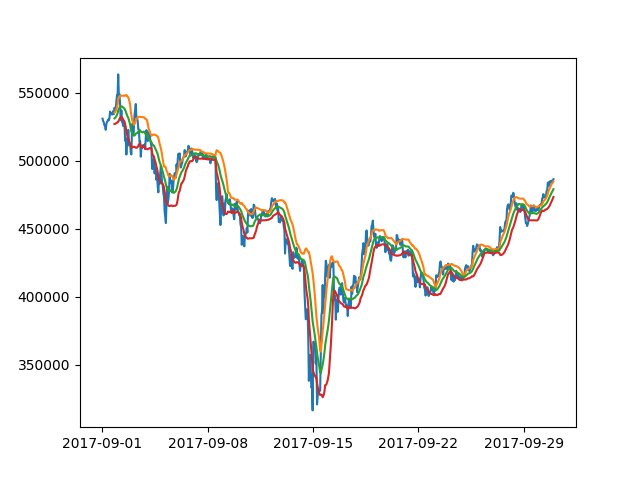

[[<matplotlib.lines.Line2D at 0x7fa330036b00>],

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
data = hd.data()['Close']
x = data.index
y = data.values
sd = 1
upper, middle, lower = talib.BBANDS(data.values, timeperiod=20, matype=talib.MA_Type.SMA, nbdevup=sd, nbdevdn=sd)
[plt.plot(x, val) for val in [y, upper, middle, lower]]

In [ ]:
data.values

array([ 530988.,  529184.,  528301.,  526000.,  526119.,  522800.,
        526654.,  528600.,  529221.,  530312.,  529731.,  531199.,
        536200.,  534996.,  534999.,  533978.,  534329.,  536574.,
        534237.,  538993.,  538192.,  538244.,  543200.,  548180.,
        548200.,  563508.,  548007.,  549048.,  541463.,  529923.,
        537005.,  528498.,  528146.,  525500.,  528124.,  527075.,
        514779.,  516799.,  504591.,  515323.,  510900.,  522738.,
        513957.,  512897.,  512351.,  506037.,  504642.,  524753.,
        527519.,  519149.,  524215.,  533531.,  537500.,  541742.,
        531856.,  531479.,  529147.,  523179.,  523033.,  513630.,
        514333.,  502993.,  510085.,  509419.,  511441.,  510222.,
        510824.,  511948.,  508539.,  517634.,  522497.,  520261.,
        514471.,  517032.,  517365.,  521406.,  515790.,  512798.,
        510509.,  494000.,  494149.,  499184.,  501501.,  490721.,
        495100.,  492063.,  485965.,  489115.,  481067.,  4767

## References

- [Deep Q-LearningでFXしてみた](http://recruit.gmo.jp/engineer/jisedai/blog/deep-q-learning/)
- [slide](https://www.slideshare.net/JunichiroKatsuta/deep-qlearningfx)

## TODO

足の配列について、indexの外を読み出そうとしている節があるので直す。

```json
{
 insertId:  "1l630l2g1k8tnms"  
 jsonPayload: {…}  
 logName:  "projects/deep-fx/logs/deepfx"  
 receiveTimestamp:  "2017-11-18T17:12:18.459939016Z"  
 resource: {…}  
 severity:  "WARNING"  
 timestamp:  "2017-11-18T17:12:18.459939016Z"  
}
```